# Predicting Breast Cancer using PCA and PCR Analysis

# Business Problem

📌 Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

📌 The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(noncancerous). We ask you to complete the analysis of classifying these tumors using machine learning and the Breast Cancer Wisconsin (Diagnostic) Dataset.

# Dataset Story

📌 This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

# Import Necessary Libraries

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import random

pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

!pip install xgboost
!pip install lightgbm
!pip install catboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.3 MB/s eta 0:00:00


# Import Dataset

In [67]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,84300903,M,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,84348301,M,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,84358402,M,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


# General Information About to the Dataset

In [68]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [69]:
check_df(df)

######################### Head #########################
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0    842302         M      17.9900       10.3800        122.8000  1001.0000           0.1184            0.2776          0.3001               0.1471         0.2419                  0.0787     1.0950      0.9053        8.5890 153.4000         0.0064          0.0490        0.0537             0.0159       0.0300                0.0062       25.3800        17.3300         184.6000   2019.0000            0.1622             0.6656           0.7119               

# Analysis of Categorical and Numerical Variables

In [70]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [71]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 569
Variables: 32
Cat_cols: 1
Num_cols: 31
Cat_but_car: 0


In [72]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [73]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

   diagnosis  Ration
B        357 62.7417
M        212 37.2583
##########################################


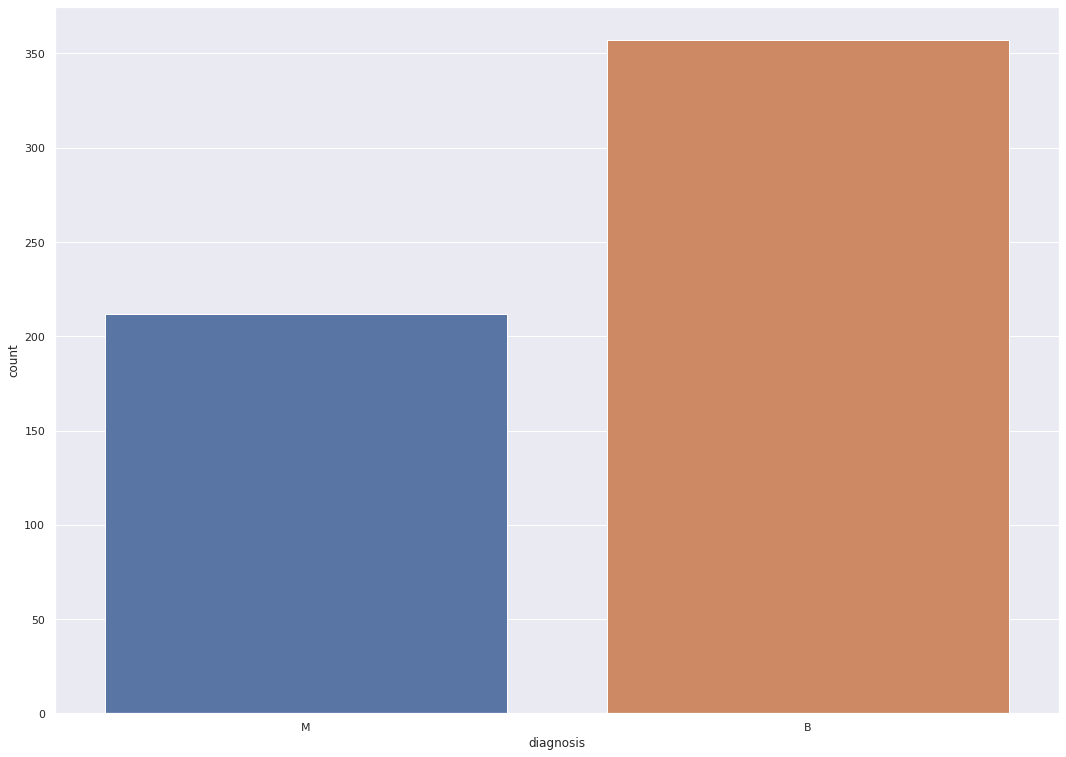

In [74]:
cat_summary_df(df)

In [75]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [76]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count         569.0000
mean     30371831.4323
std     125020585.6122
min          8670.0000
1%          86210.0400
5%          90267.0000
10%        853155.4000
20%        863174.4000
30%        875509.0000
40%        894606.8000
50%        906024.0000
60%        915890.2000
70%       8611964.8000
80%       9010707.6000
90%      88144221.8000
95%      90424461.4000
99%     901034301.3200
max     911320502.0000
Name: id, dtype: float64


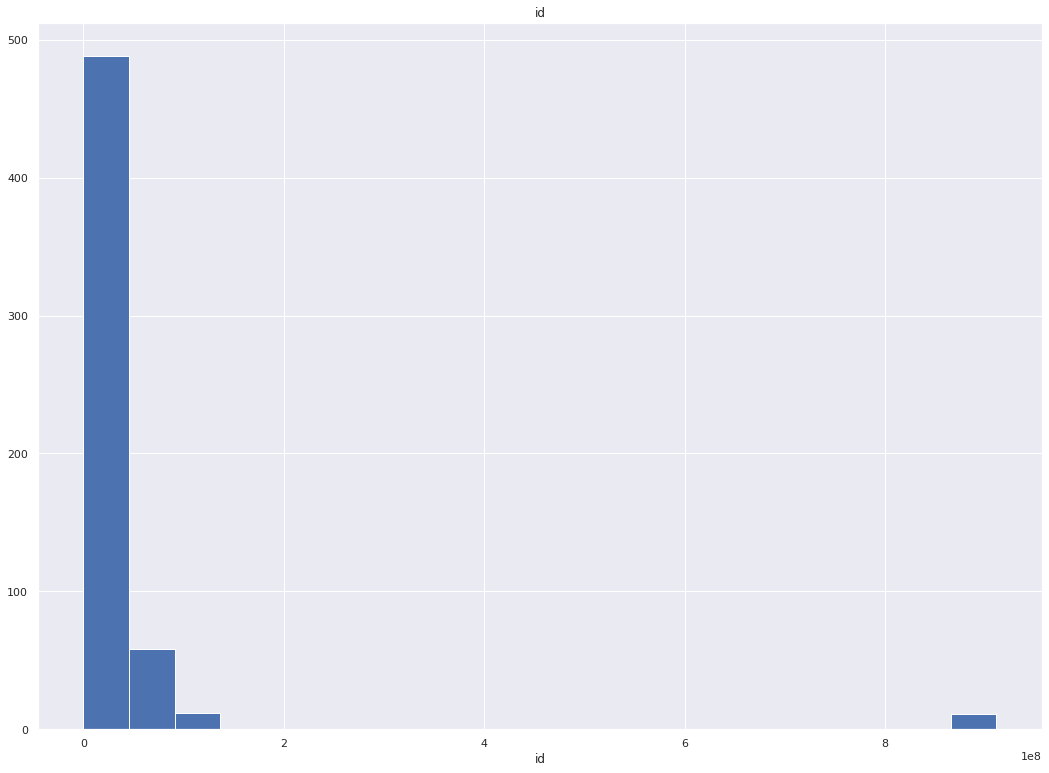

count   569.0000
mean     14.1273
std       3.5240
min       6.9810
1%        8.4584
5%        9.5292
10%      10.2600
20%      11.3660
30%      12.0120
40%      12.7260
50%      13.3700
60%      14.0580
70%      15.0560
80%      17.0680
90%      19.5300
95%      20.5760
99%      24.3716
max      28.1100
Name: radius_mean, dtype: float64


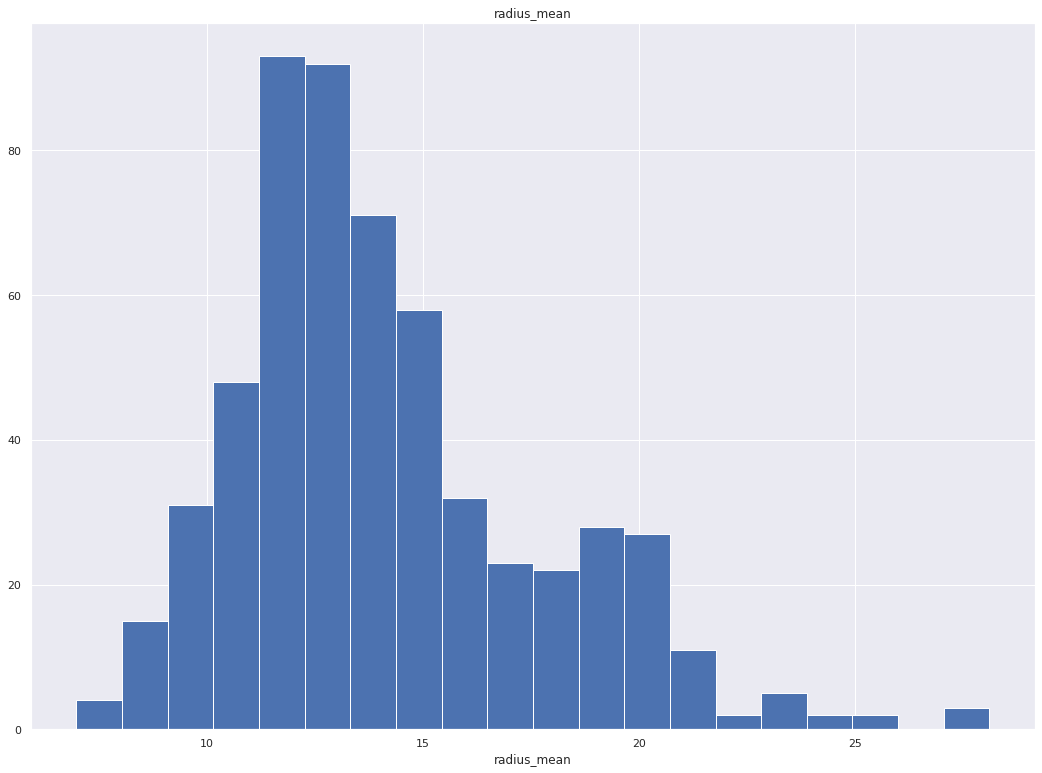

count   569.0000
mean     19.2896
std       4.3010
min       9.7100
1%       10.9304
5%       13.0880
10%      14.0780
20%      15.6560
30%      16.8400
40%      17.9120
50%      18.8400
60%      19.9680
70%      21.2720
80%      22.4400
90%      24.9920
95%      27.1500
99%      30.6520
max      39.2800
Name: texture_mean, dtype: float64


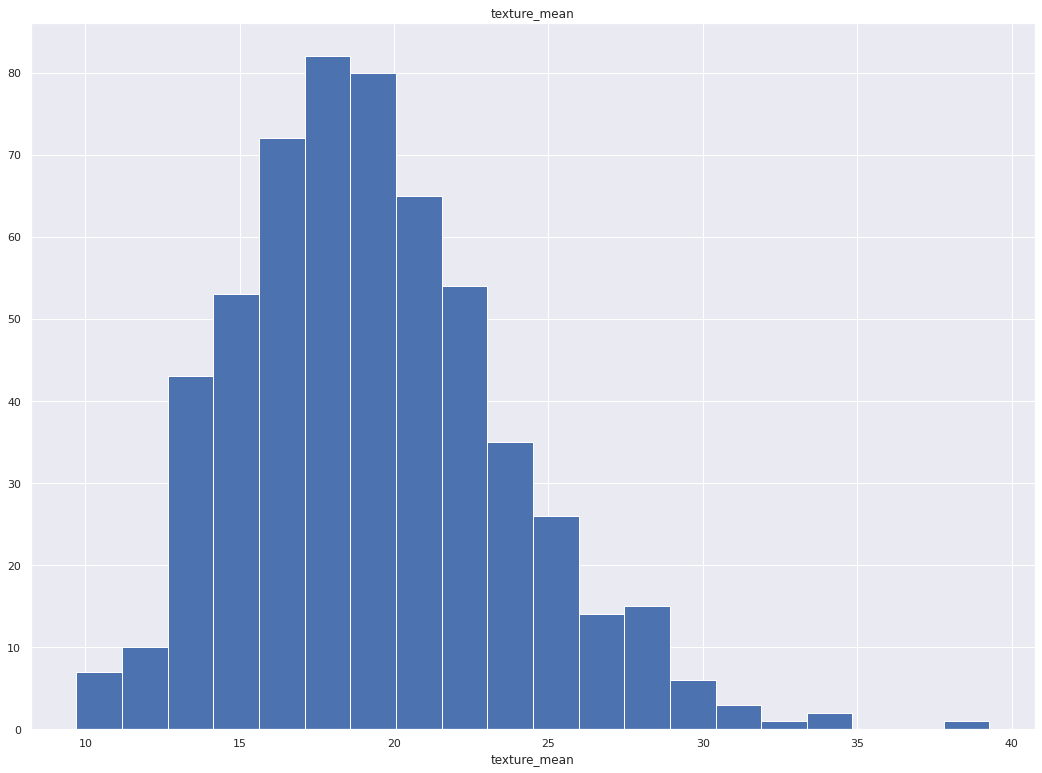

count   569.0000
mean     91.9690
std      24.2990
min      43.7900
1%       53.8276
5%       60.4960
10%      65.8300
20%      73.2920
30%      77.3600
40%      81.9380
50%      86.2400
60%      91.4200
70%      98.2000
80%     111.6800
90%     129.1000
95%     135.8200
99%     165.7240
max     188.5000
Name: perimeter_mean, dtype: float64


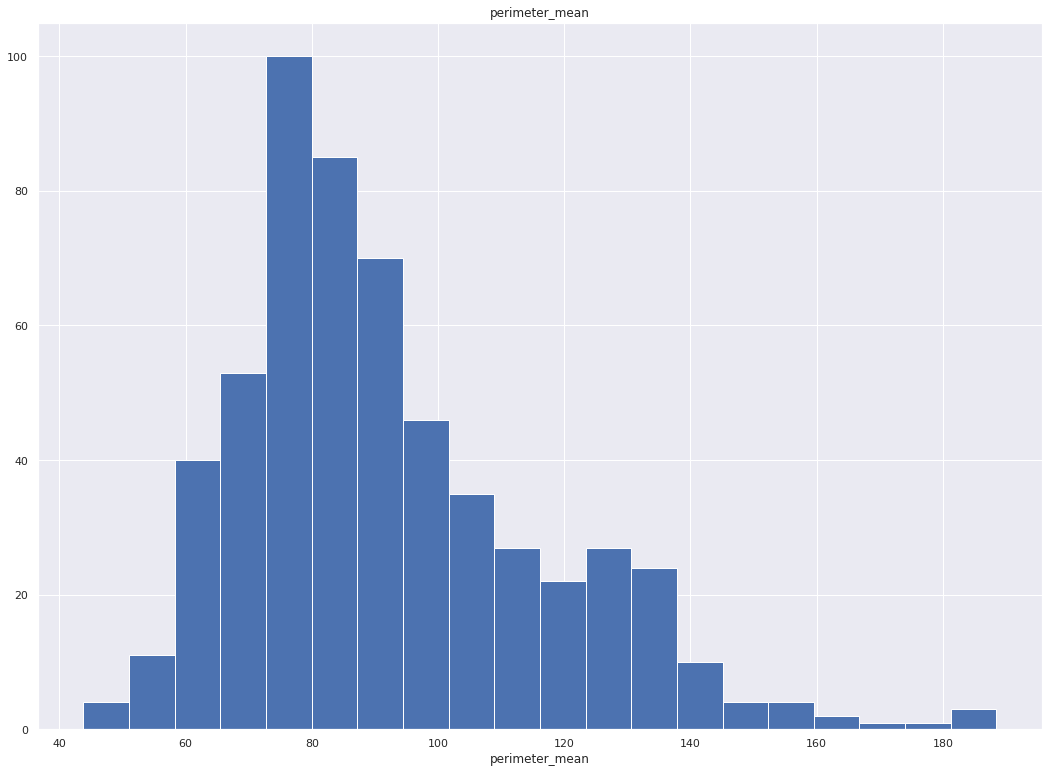

count    569.0000
mean     654.8891
std      351.9141
min      143.5000
1%       215.6640
5%       275.7800
10%      321.6000
20%      396.5600
30%      444.0600
40%      496.4400
50%      551.1000
60%      609.7400
70%      700.6600
80%      915.0600
90%     1177.4000
95%     1309.8000
99%     1786.6000
max     2501.0000
Name: area_mean, dtype: float64


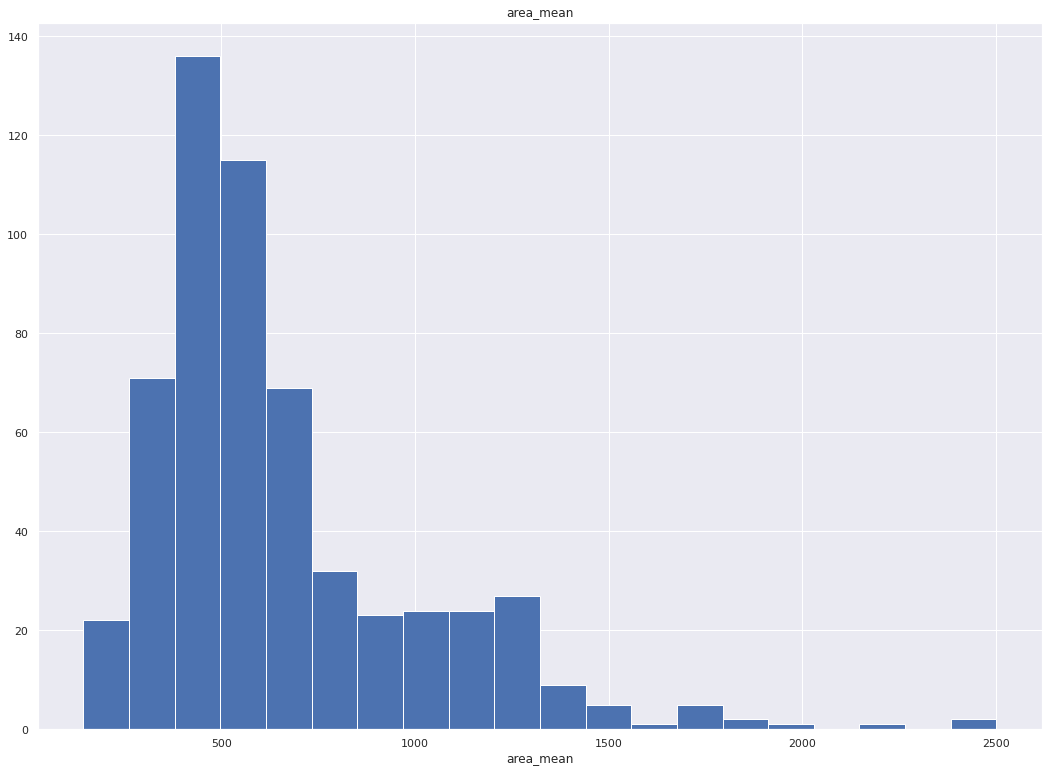

count   569.0000
mean      0.0964
std       0.0141
min       0.0526
1%        0.0687
5%        0.0750
10%       0.0797
20%       0.0842
30%       0.0879
40%       0.0918
50%       0.0959
60%       0.0993
70%       0.1033
80%       0.1075
90%       0.1148
95%       0.1188
99%       0.1329
max       0.1634
Name: smoothness_mean, dtype: float64


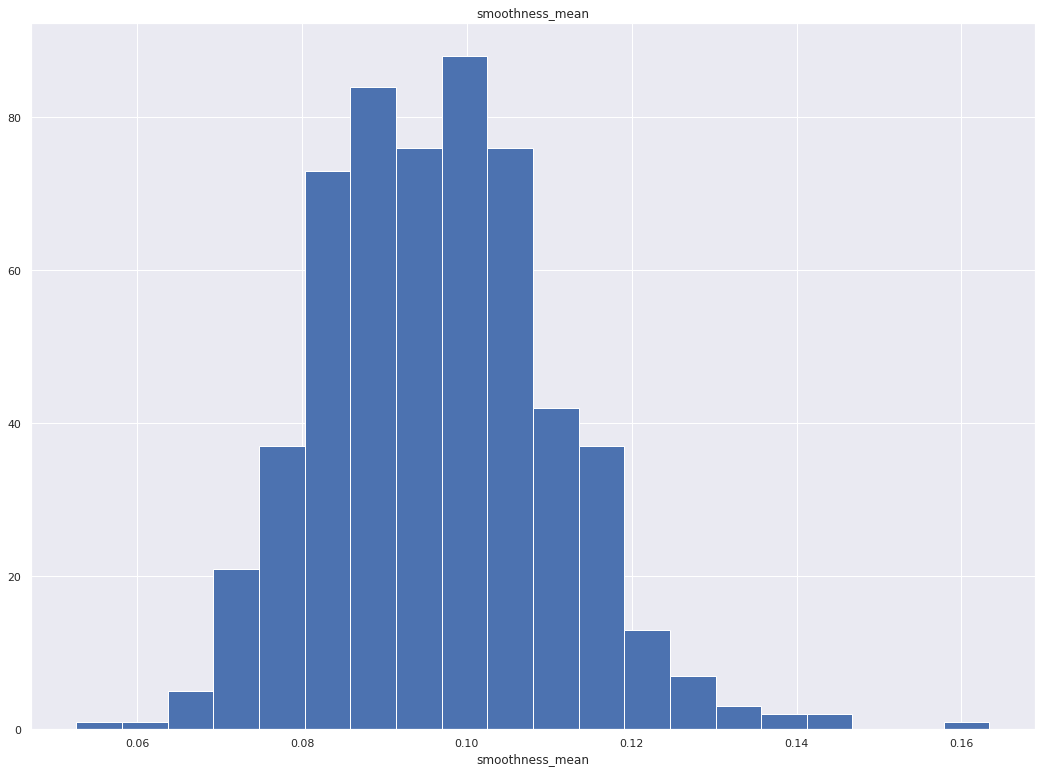

count   569.0000
mean      0.1043
std       0.0528
min       0.0194
1%        0.0334
5%        0.0407
10%       0.0497
20%       0.0596
30%       0.0704
40%       0.0795
50%       0.0926
60%       0.1087
70%       0.1224
80%       0.1419
90%       0.1755
95%       0.2087
99%       0.2772
max       0.3454
Name: compactness_mean, dtype: float64


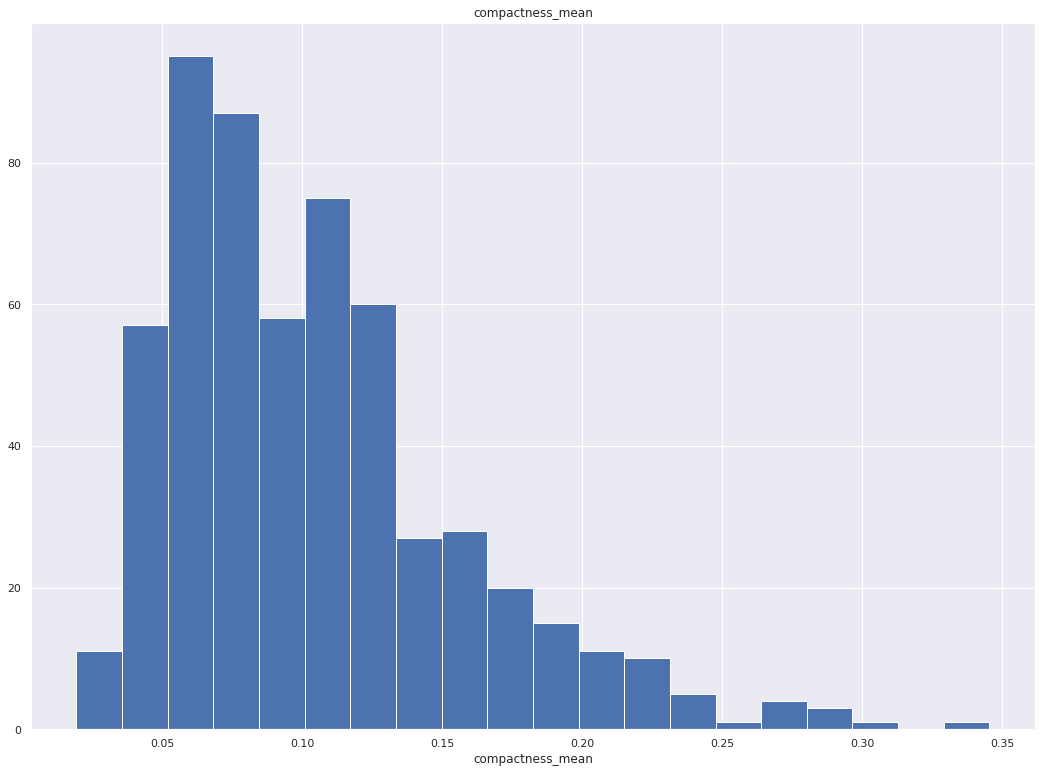

count   569.0000
mean      0.0888
std       0.0797
min       0.0000
1%        0.0000
5%        0.0050
10%       0.0137
20%       0.0249
30%       0.0344
40%       0.0451
50%       0.0615
60%       0.0862
70%       0.1119
80%       0.1498
90%       0.2030
95%       0.2430
99%       0.3517
max       0.4268
Name: concavity_mean, dtype: float64


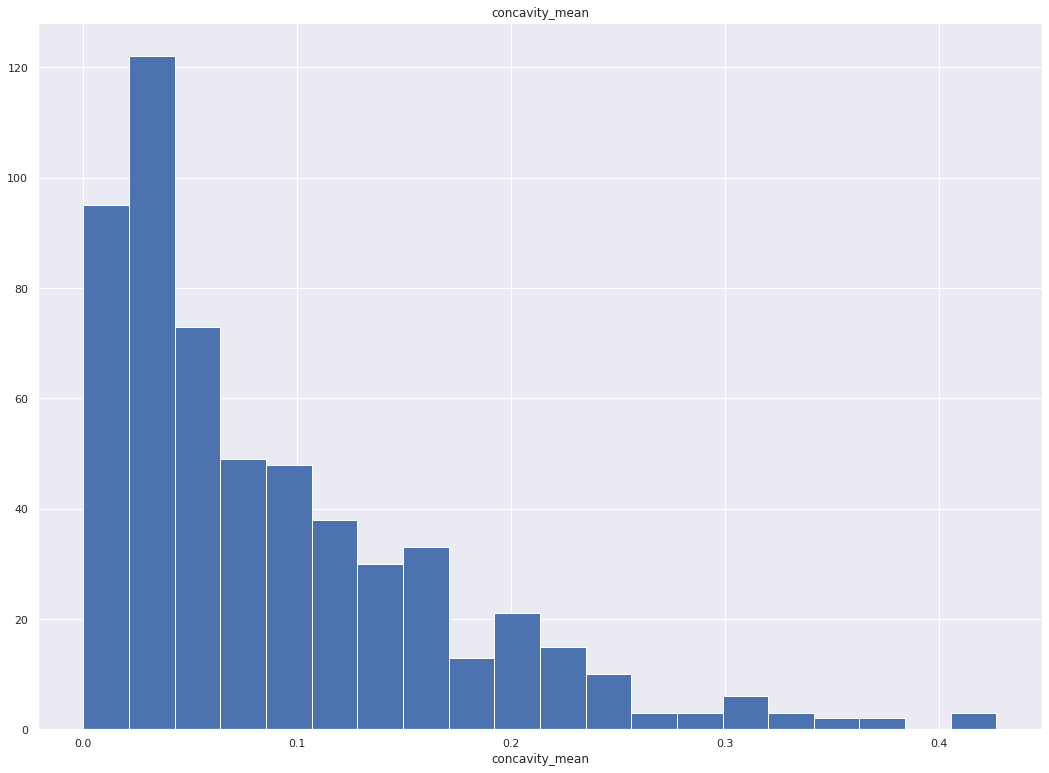

count   569.0000
mean      0.0489
std       0.0388
min       0.0000
1%        0.0000
5%        0.0056
10%       0.0112
20%       0.0179
30%       0.0228
40%       0.0280
50%       0.0335
60%       0.0483
70%       0.0645
80%       0.0843
90%       0.1004
95%       0.1257
99%       0.1642
max       0.2012
Name: concave points_mean, dtype: float64


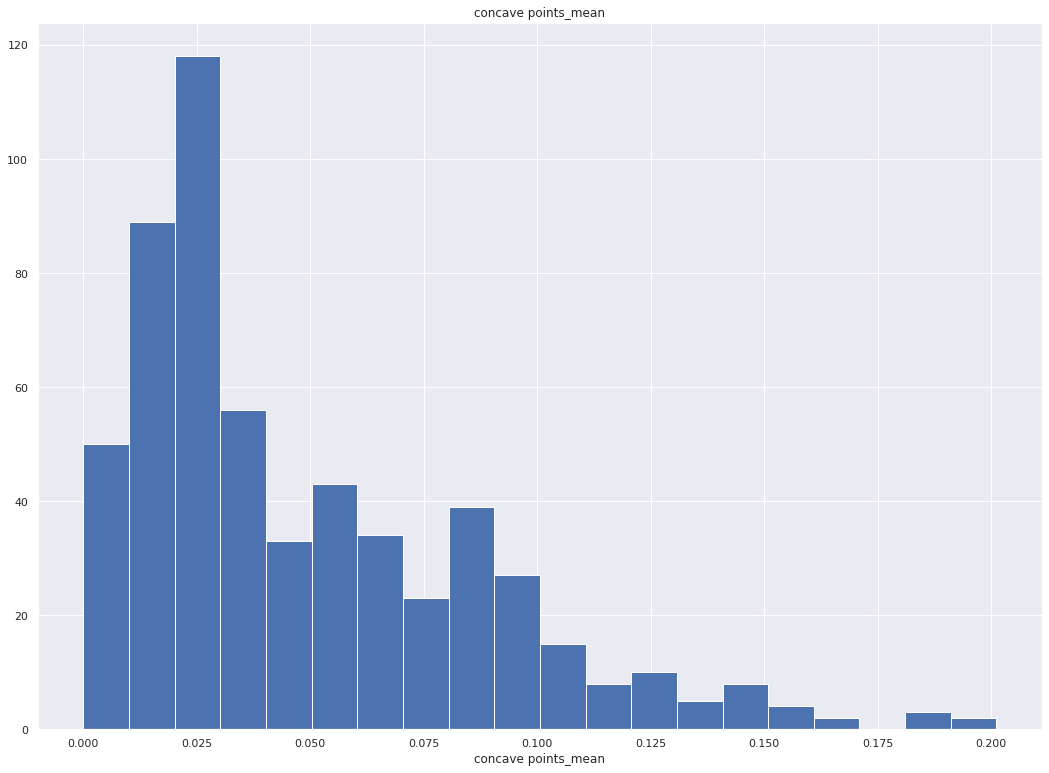

count   569.0000
mean      0.1812
std       0.0274
min       0.1060
1%        0.1295
5%        0.1415
10%       0.1496
20%       0.1588
30%       0.1651
40%       0.1720
50%       0.1792
60%       0.1855
70%       0.1928
80%       0.2005
90%       0.2149
95%       0.2307
99%       0.2596
max       0.3040
Name: symmetry_mean, dtype: float64


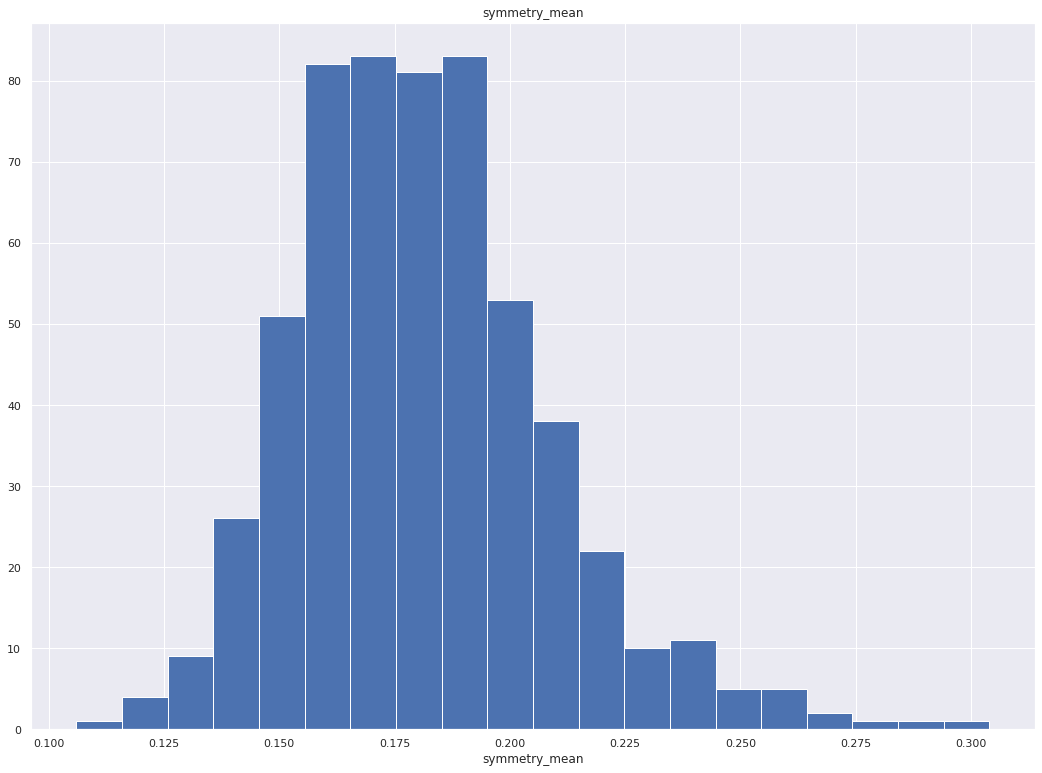

count   569.0000
mean      0.0628
std       0.0071
min       0.0500
1%        0.0515
5%        0.0539
10%       0.0553
20%       0.0569
30%       0.0588
40%       0.0602
50%       0.0615
60%       0.0631
70%       0.0650
80%       0.0676
90%       0.0723
95%       0.0761
99%       0.0854
max       0.0974
Name: fractal_dimension_mean, dtype: float64


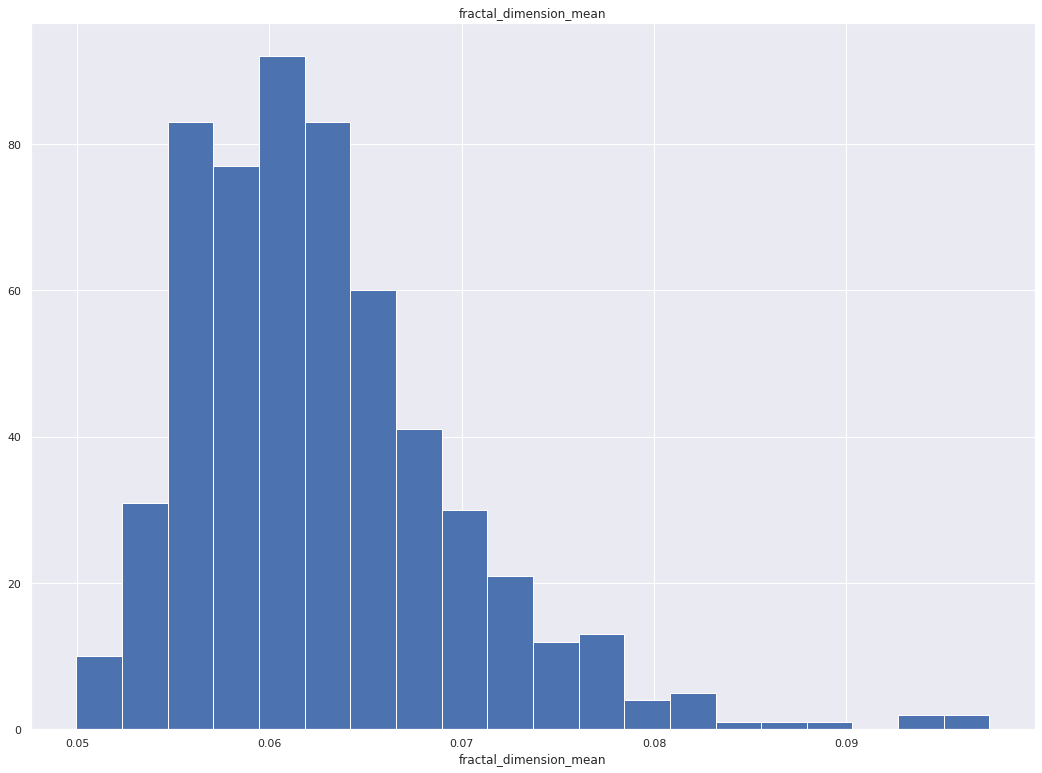

count   569.0000
mean      0.4052
std       0.2773
min       0.1115
1%        0.1197
5%        0.1601
10%       0.1831
20%       0.2193
30%       0.2460
40%       0.2802
50%       0.3242
60%       0.3695
70%       0.4310
80%       0.5461
90%       0.7489
95%       0.9595
99%       1.2913
max       2.8730
Name: radius_se, dtype: float64


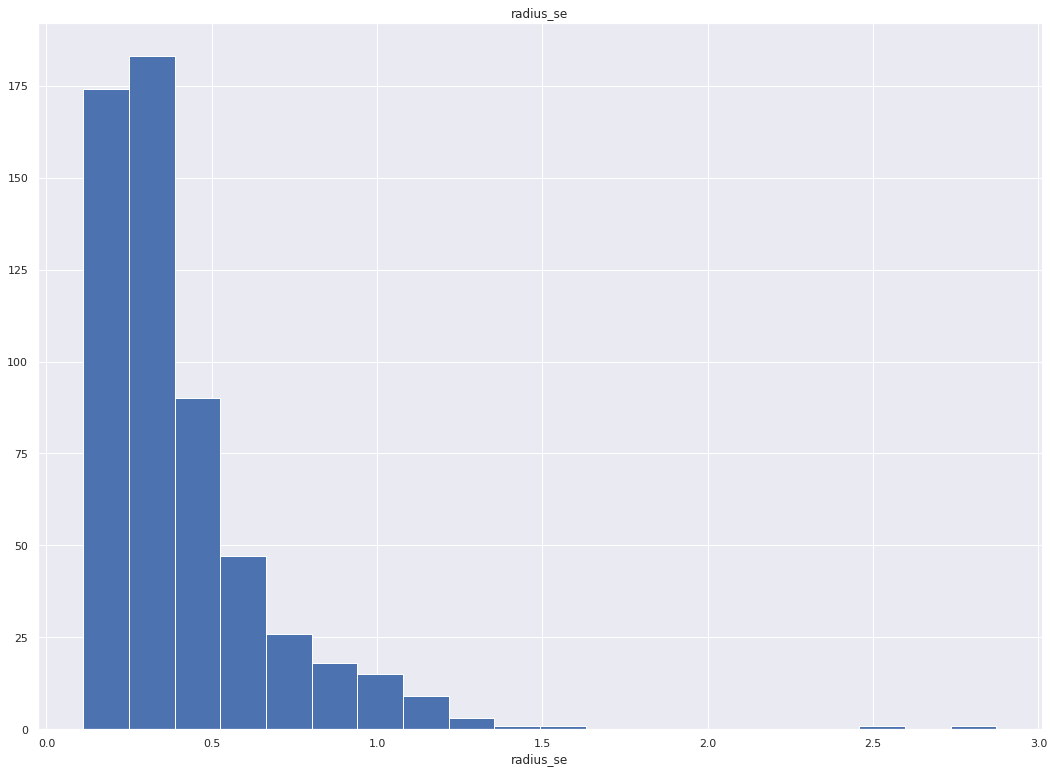

count   569.0000
mean      1.2169
std       0.5516
min       0.3602
1%        0.4105
5%        0.5401
10%       0.6404
20%       0.7806
30%       0.9021
40%       1.0052
50%       1.1080
60%       1.2388
70%       1.3882
80%       1.5612
90%       1.9094
95%       2.2120
99%       2.9154
max       4.8850
Name: texture_se, dtype: float64


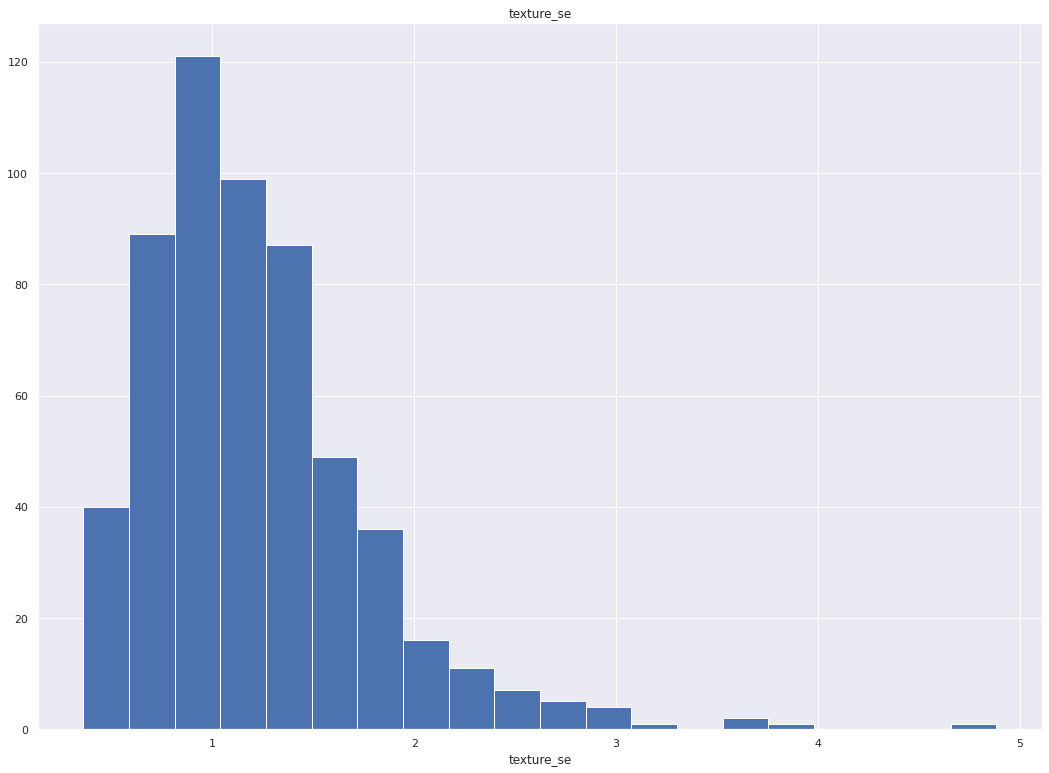

count   569.0000
mean      2.8661
std       2.0219
min       0.7570
1%        0.9532
5%        1.1328
10%       1.2802
20%       1.5166
30%       1.7408
40%       2.0394
50%       2.2870
60%       2.5908
70%       3.0502
80%       3.7678
90%       5.1232
95%       7.0416
99%       9.6900
max      21.9800
Name: perimeter_se, dtype: float64


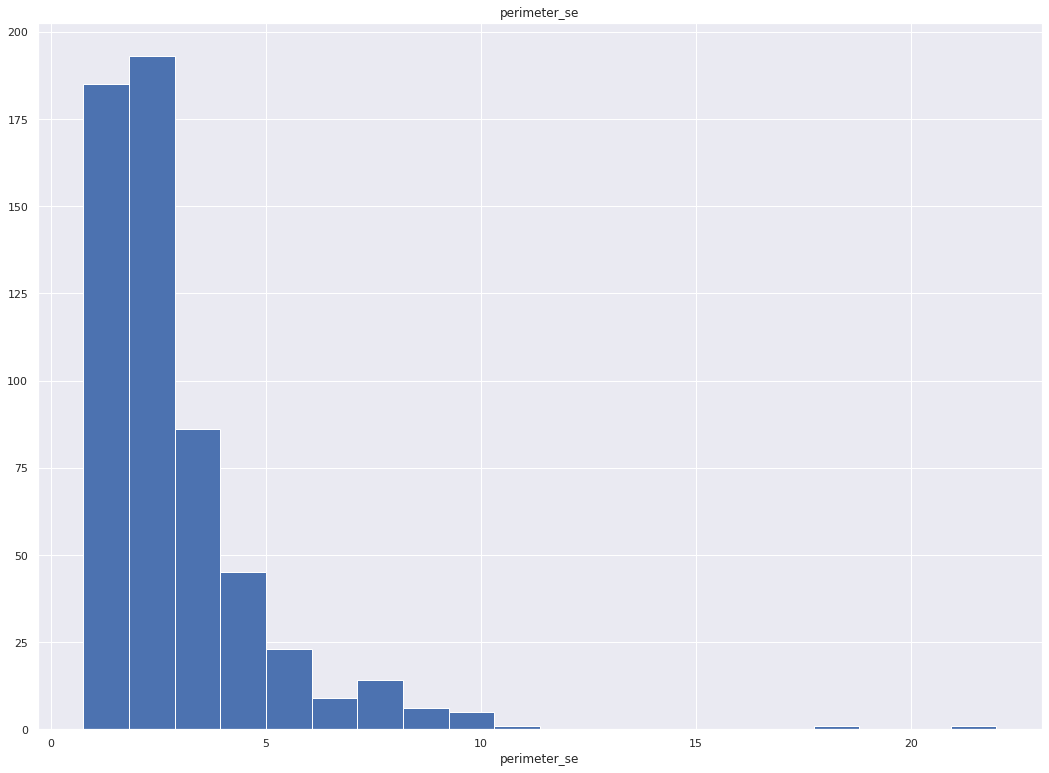

count   569.0000
mean     40.3371
std      45.4910
min       6.8020
1%        8.5144
5%       11.3600
10%      13.1600
20%      16.6400
30%      19.0380
40%      21.0780
50%      24.5300
60%      29.3220
70%      38.4300
80%      54.0880
90%      91.3140
95%     115.8000
99%     177.6840
max     542.2000
Name: area_se, dtype: float64


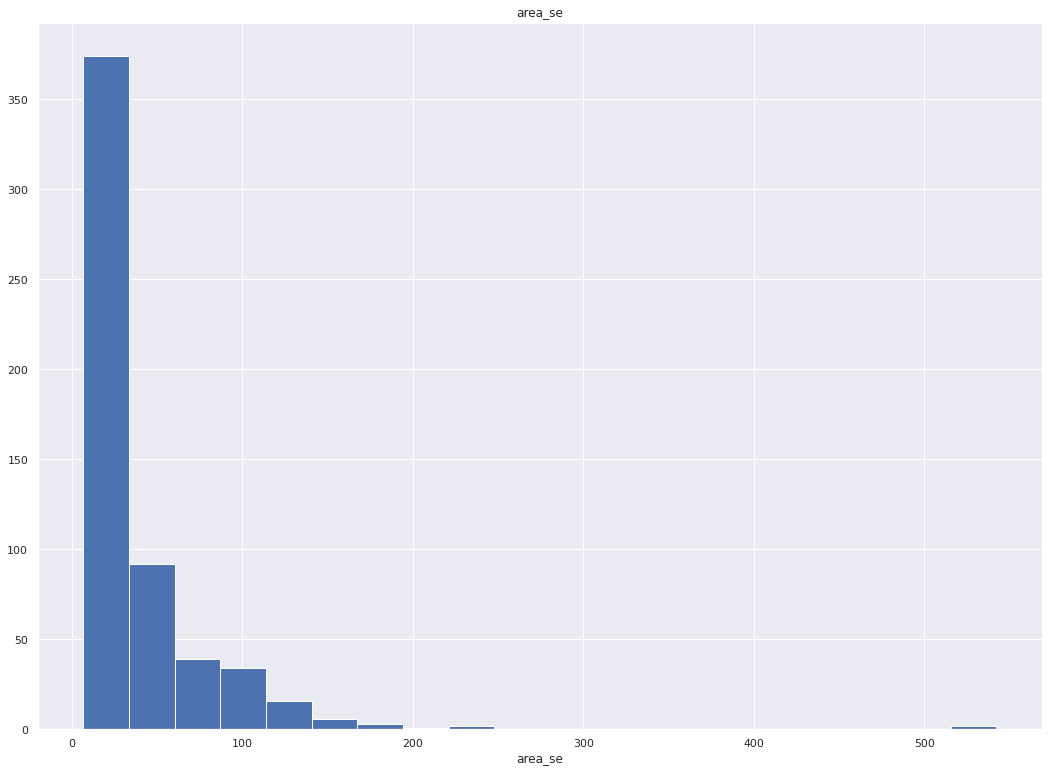

count   569.0000
mean      0.0070
std       0.0030
min       0.0017
1%        0.0031
5%        0.0037
10%       0.0042
20%       0.0049
30%       0.0054
40%       0.0058
50%       0.0064
60%       0.0069
70%       0.0078
80%       0.0088
90%       0.0104
95%       0.0126
99%       0.0173
max       0.0311
Name: smoothness_se, dtype: float64


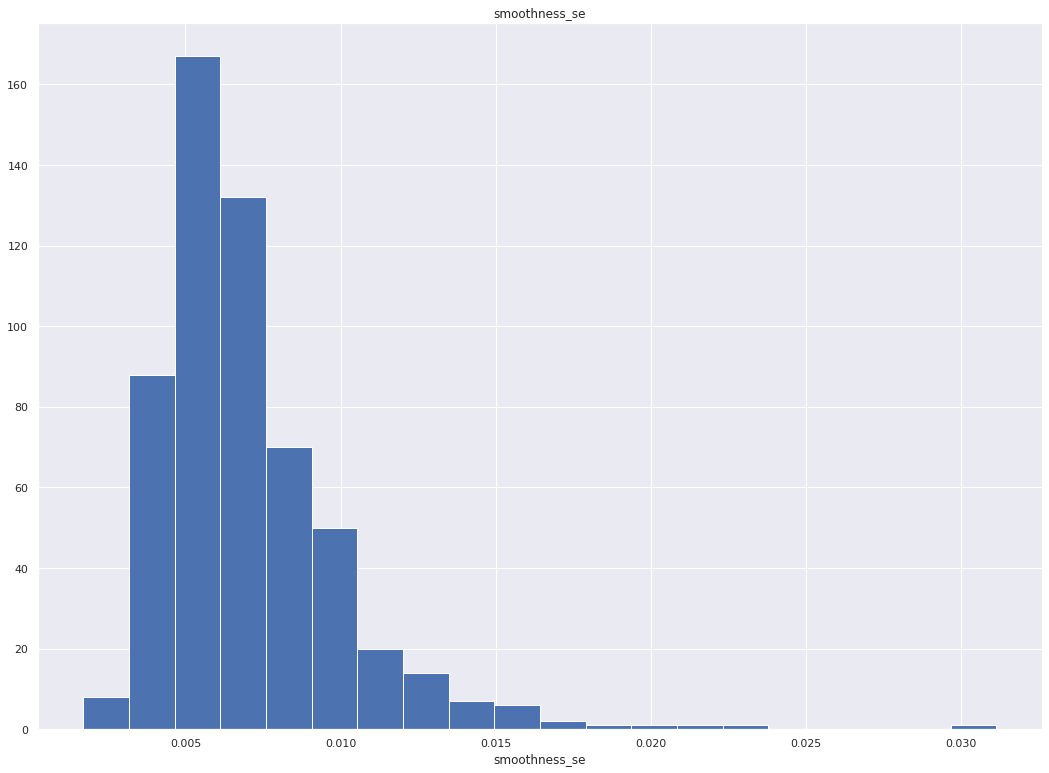

count   569.0000
mean      0.0255
std       0.0179
min       0.0023
1%        0.0047
5%        0.0079
10%       0.0092
20%       0.0118
30%       0.0142
40%       0.0170
50%       0.0204
60%       0.0245
70%       0.0301
80%       0.0362
90%       0.0476
95%       0.0606
99%       0.0899
max       0.1354
Name: compactness_se, dtype: float64


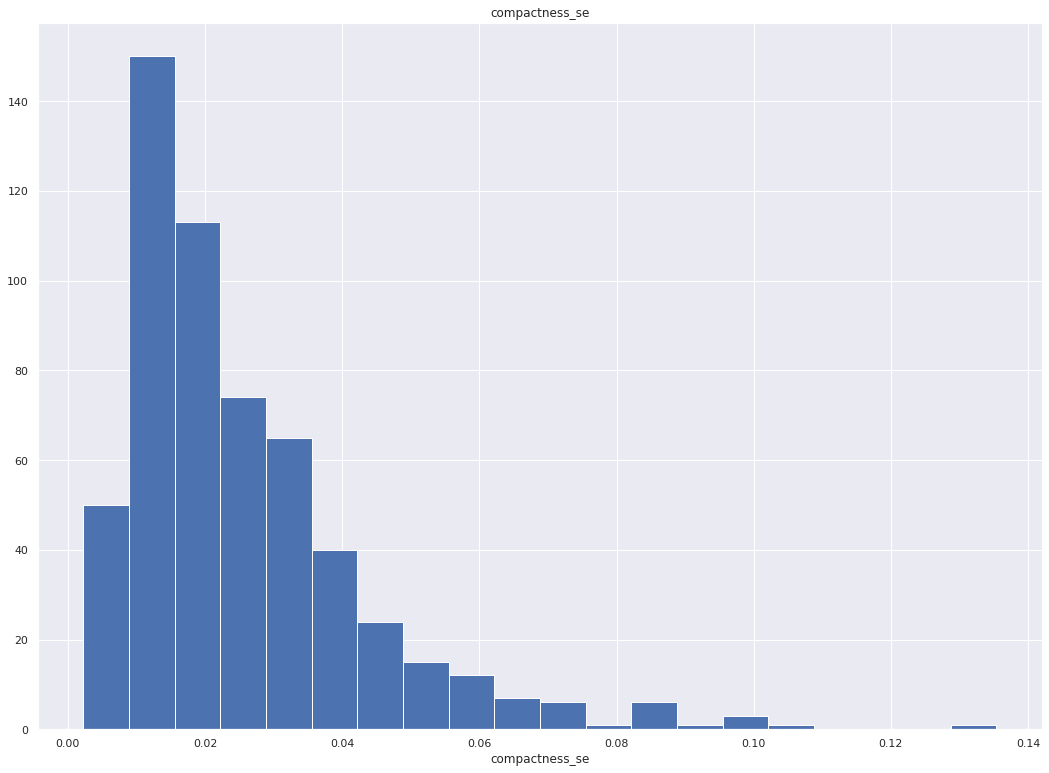

count   569.0000
mean      0.0319
std       0.0302
min       0.0000
1%        0.0000
5%        0.0033
10%       0.0077
20%       0.0132
30%       0.0170
40%       0.0205
50%       0.0259
60%       0.0305
70%       0.0374
80%       0.0464
90%       0.0585
95%       0.0789
99%       0.1223
max       0.3960
Name: concavity_se, dtype: float64


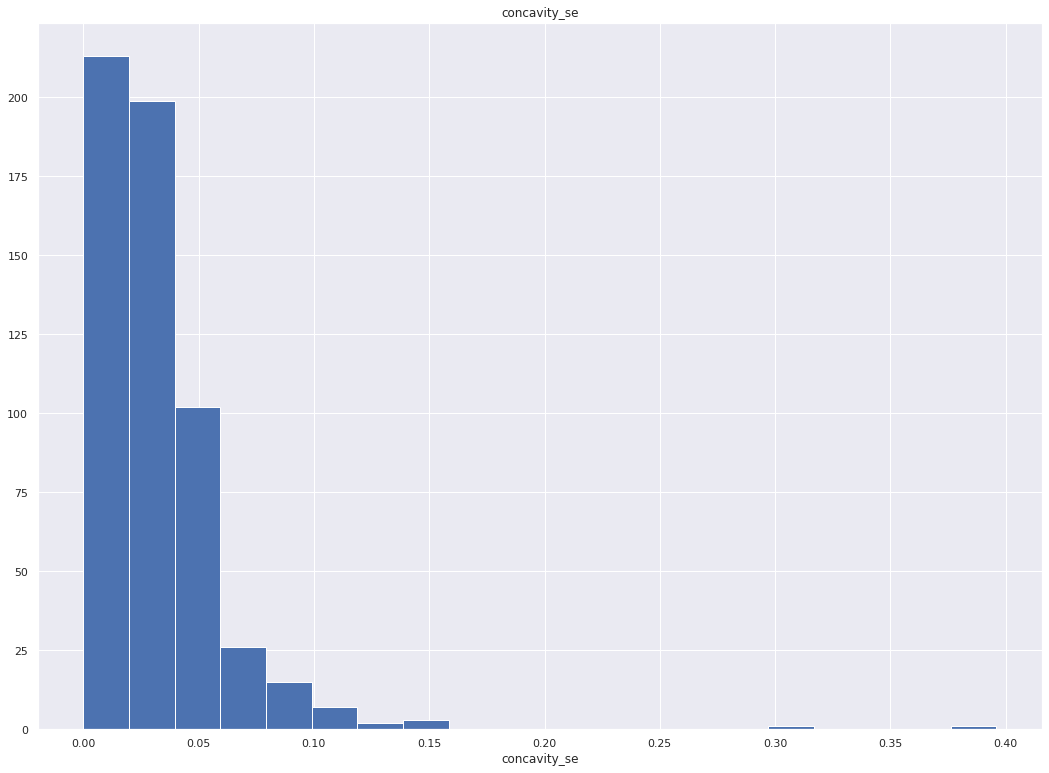

count   569.0000
mean      0.0118
std       0.0062
min       0.0000
1%        0.0000
5%        0.0038
10%       0.0055
20%       0.0069
30%       0.0085
40%       0.0096
50%       0.0109
60%       0.0124
70%       0.0137
80%       0.0158
90%       0.0187
95%       0.0229
99%       0.0312
max       0.0528
Name: concave points_se, dtype: float64


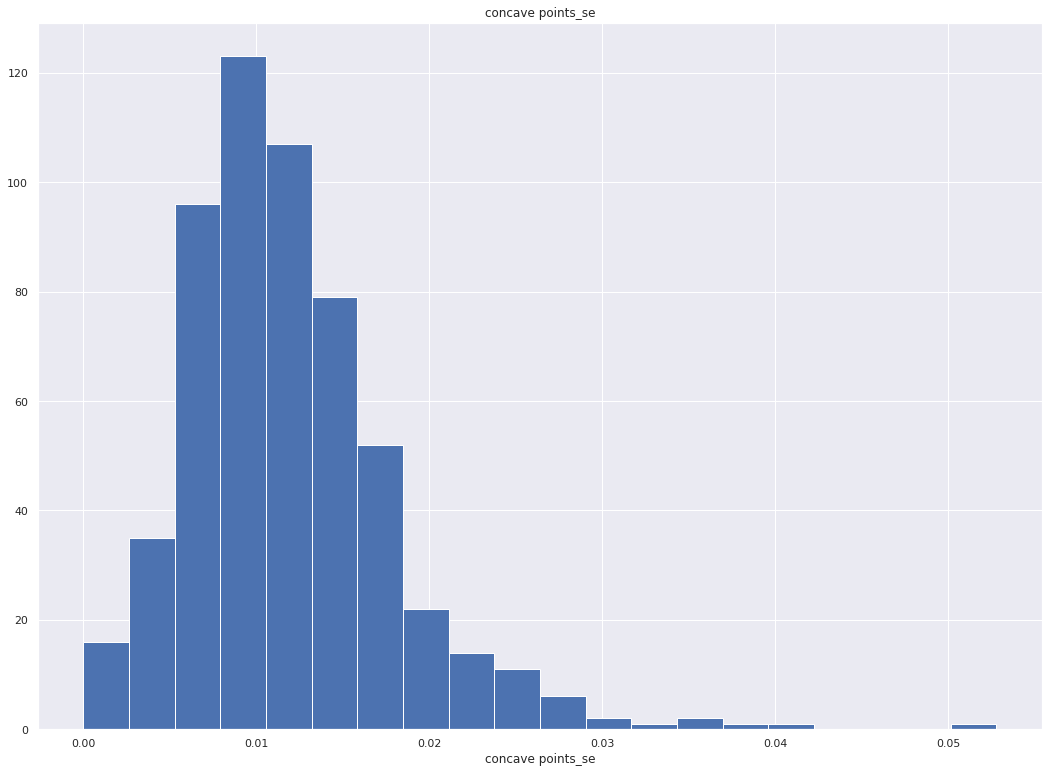

count   569.0000
mean      0.0205
std       0.0083
min       0.0079
1%        0.0105
5%        0.0118
10%       0.0130
20%       0.0145
30%       0.0157
40%       0.0172
50%       0.0187
60%       0.0201
70%       0.0220
80%       0.0257
90%       0.0301
95%       0.0350
99%       0.0522
max       0.0790
Name: symmetry_se, dtype: float64


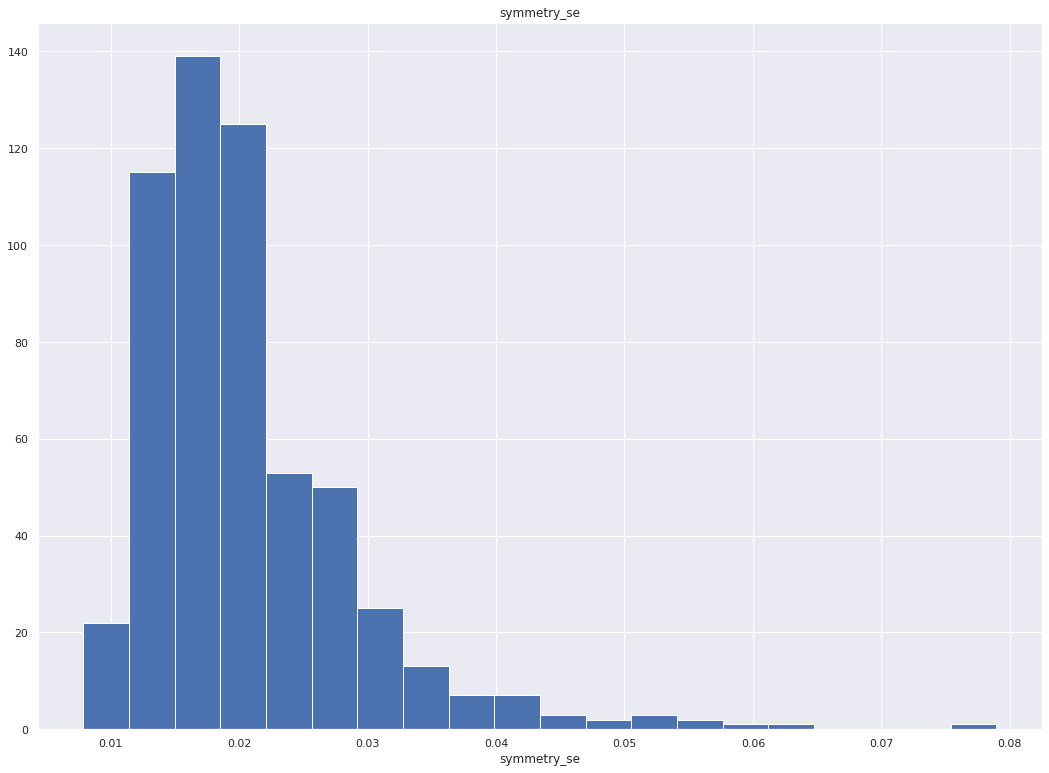

count   569.0000
mean      0.0038
std       0.0026
min       0.0009
1%        0.0011
5%        0.0015
10%       0.0017
20%       0.0021
30%       0.0024
40%       0.0028
50%       0.0032
60%       0.0036
70%       0.0042
80%       0.0048
90%       0.0062
95%       0.0080
99%       0.0126
max       0.0298
Name: fractal_dimension_se, dtype: float64


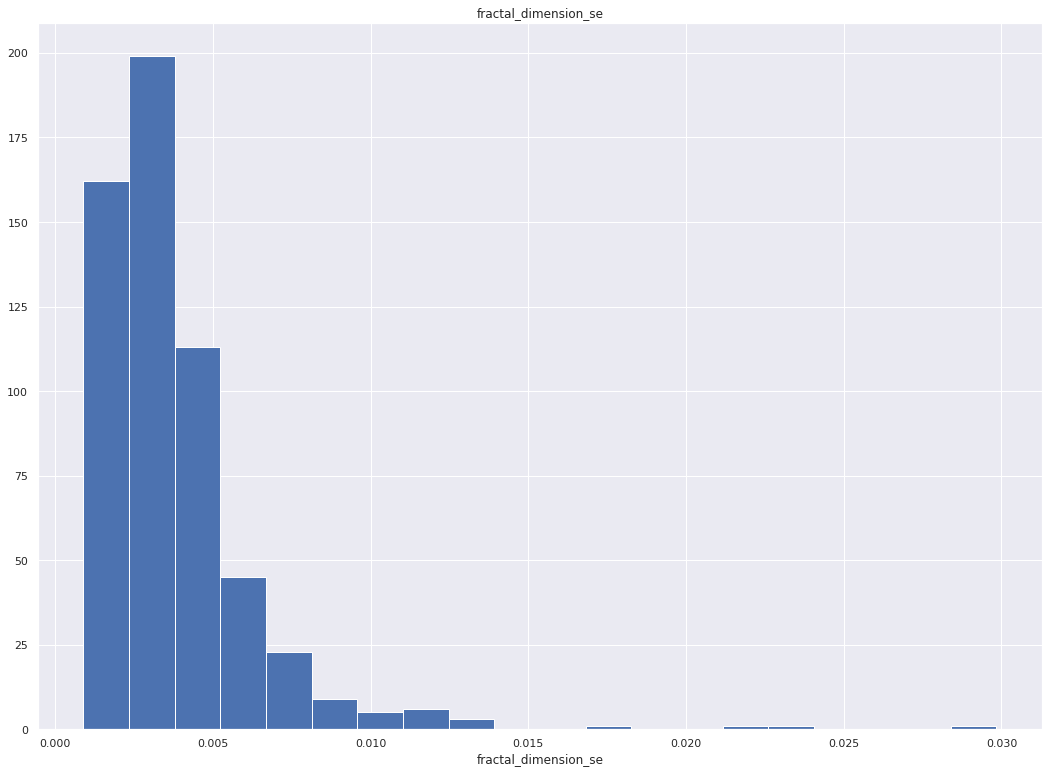

count   569.0000
mean     16.2692
std       4.8332
min       7.9300
1%        9.2076
5%       10.5340
10%      11.2340
20%      12.4980
30%      13.3140
40%      14.0080
50%      14.9700
60%      16.0040
70%      17.3860
80%      20.2940
90%      23.6820
95%      25.6400
99%      30.7628
max      36.0400
Name: radius_worst, dtype: float64


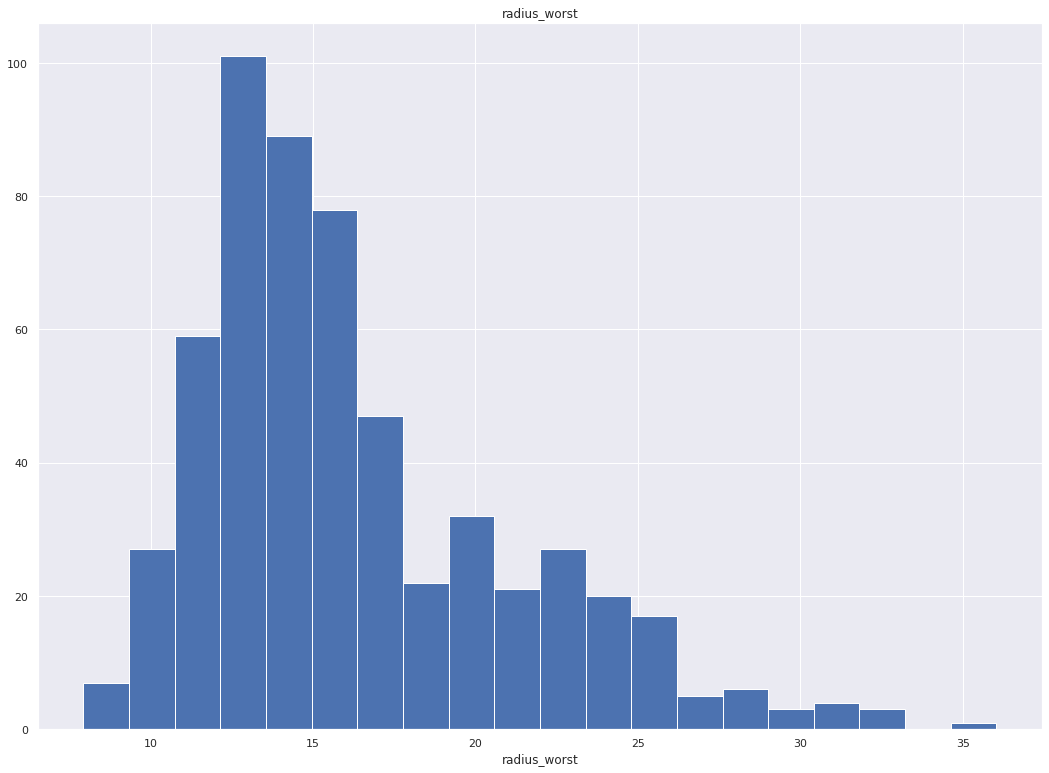

count   569.0000
mean     25.6772
std       6.1463
min      12.0200
1%       15.2008
5%       16.5740
10%      17.8000
20%      20.1760
30%      21.9880
40%      23.5840
50%      25.4100
60%      26.7240
70%      28.4600
80%      30.9080
90%      33.6460
95%      36.3000
99%      41.8024
max      49.5400
Name: texture_worst, dtype: float64


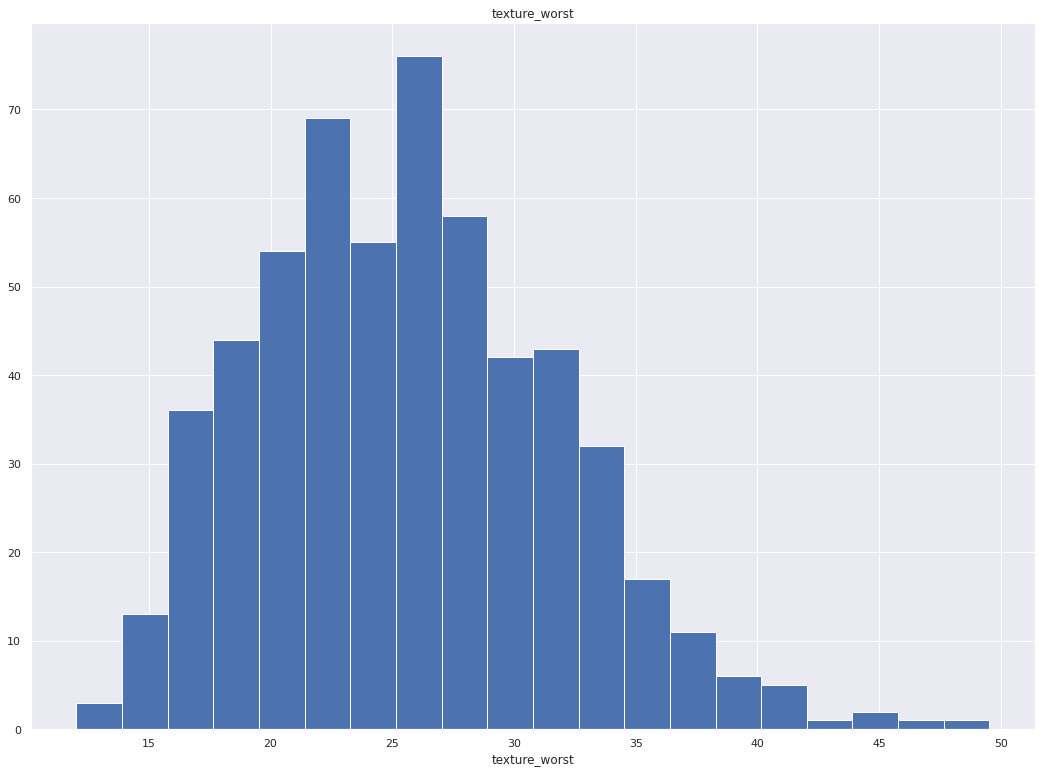

count   569.0000
mean    107.2612
std      33.6025
min      50.4100
1%       58.2704
5%       67.8560
10%      72.1780
20%      81.4020
30%      86.3280
40%      91.3040
50%      97.6600
60%     105.7400
70%     115.9000
80%     133.5000
90%     157.7400
95%     171.6400
99%     208.3040
max     251.2000
Name: perimeter_worst, dtype: float64


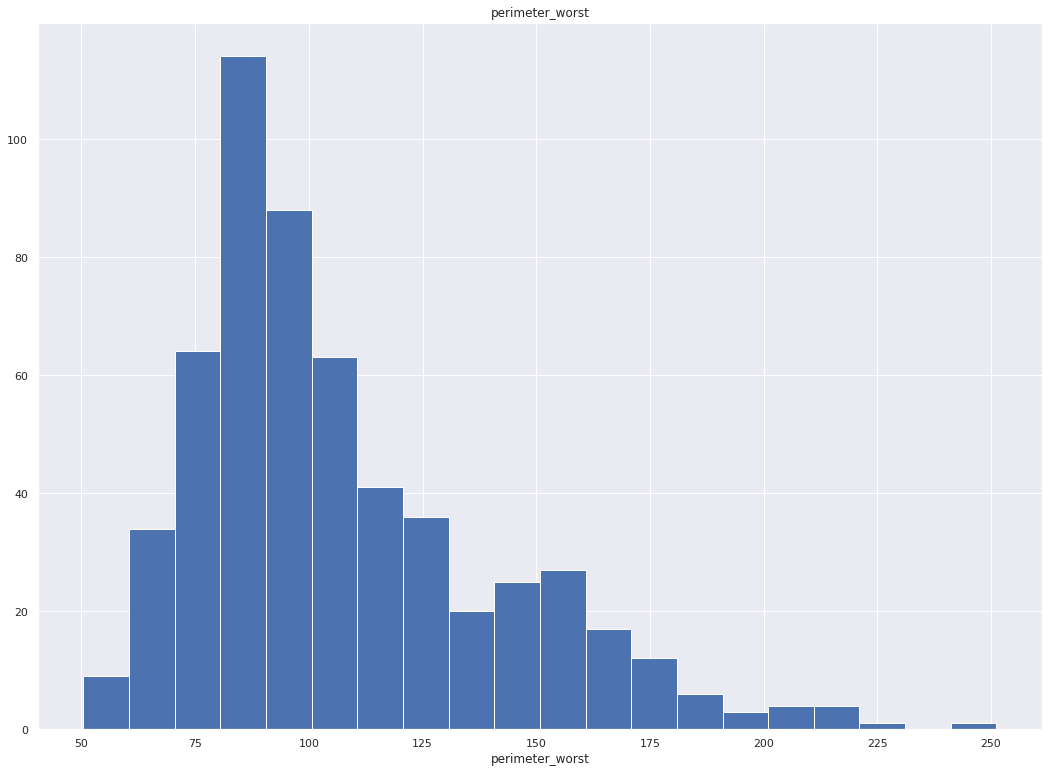

count    569.0000
mean     880.5831
std      569.3570
min      185.2000
1%       256.1920
5%       331.0600
10%      384.7200
20%      475.9800
30%      544.1400
40%      599.7000
50%      686.5000
60%      781.1800
70%      926.9600
80%     1269.0000
90%     1673.0000
95%     2009.6000
99%     2918.1600
max     4254.0000
Name: area_worst, dtype: float64


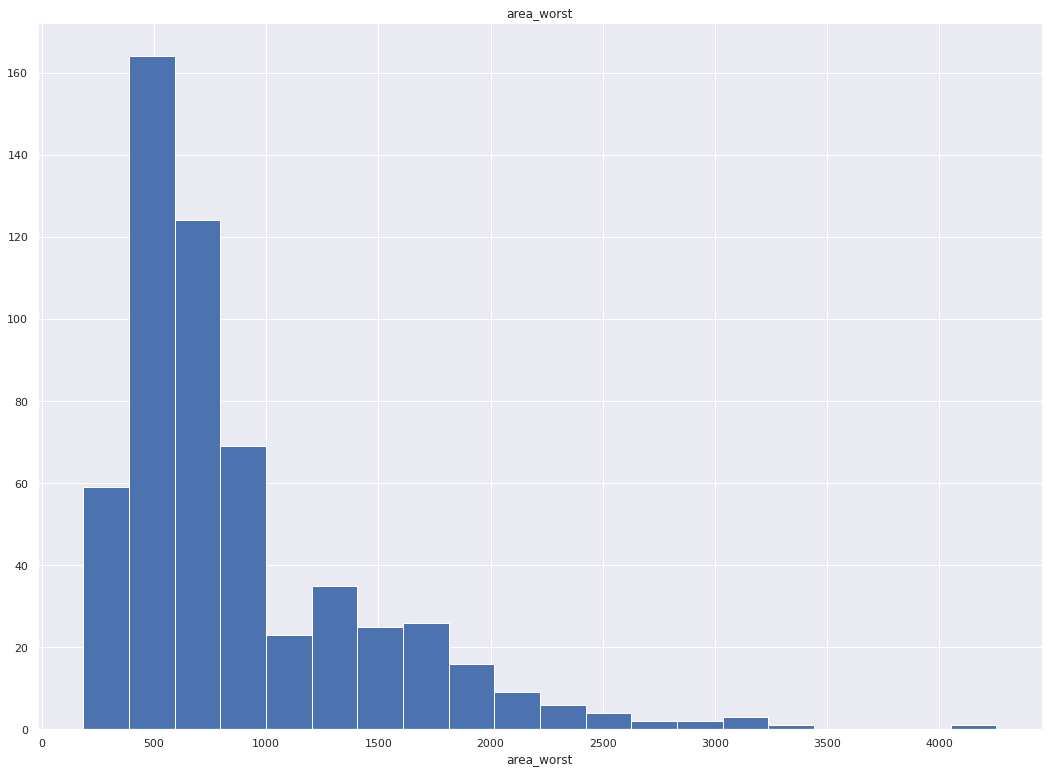

count   569.0000
mean      0.1324
std       0.0228
min       0.0712
1%        0.0879
5%        0.0957
10%       0.1030
20%       0.1125
30%       0.1207
40%       0.1263
50%       0.1313
60%       0.1377
70%       0.1426
80%       0.1501
90%       0.1615
95%       0.1718
99%       0.1889
max       0.2226
Name: smoothness_worst, dtype: float64


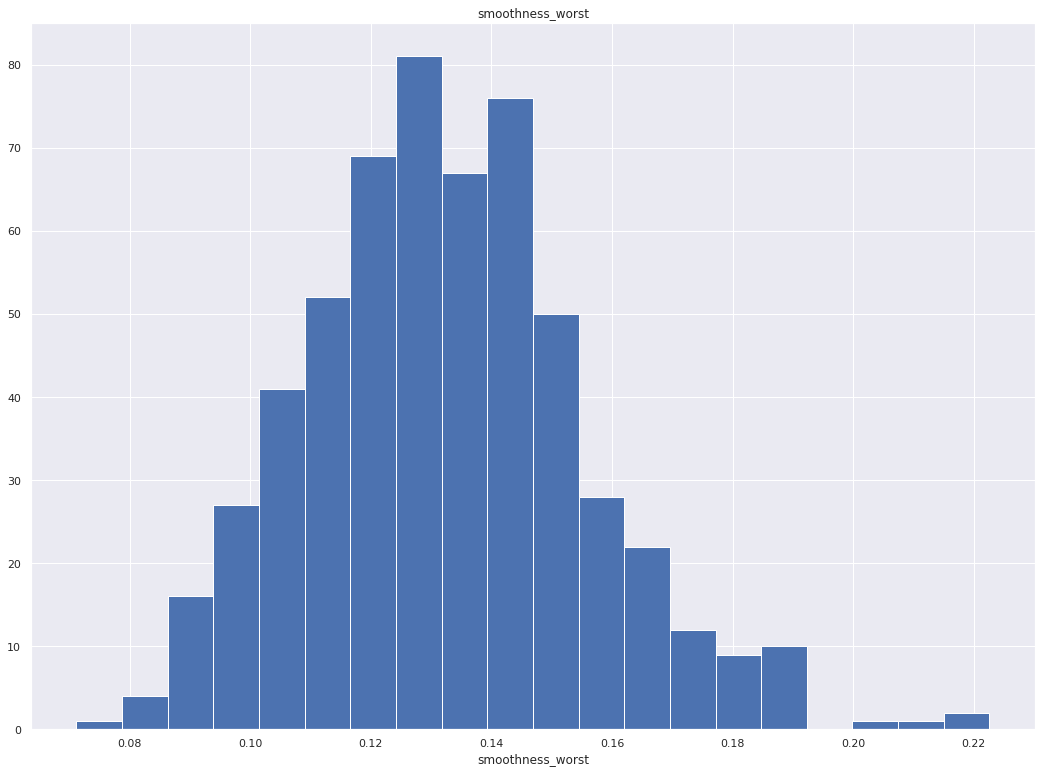

count   569.0000
mean      0.2543
std       0.1573
min       0.0273
1%        0.0501
5%        0.0712
10%       0.0937
20%       0.1257
30%       0.1614
40%       0.1846
50%       0.2119
60%       0.2514
70%       0.3040
80%       0.3671
90%       0.4478
95%       0.5641
99%       0.7786
max       1.0580
Name: compactness_worst, dtype: float64


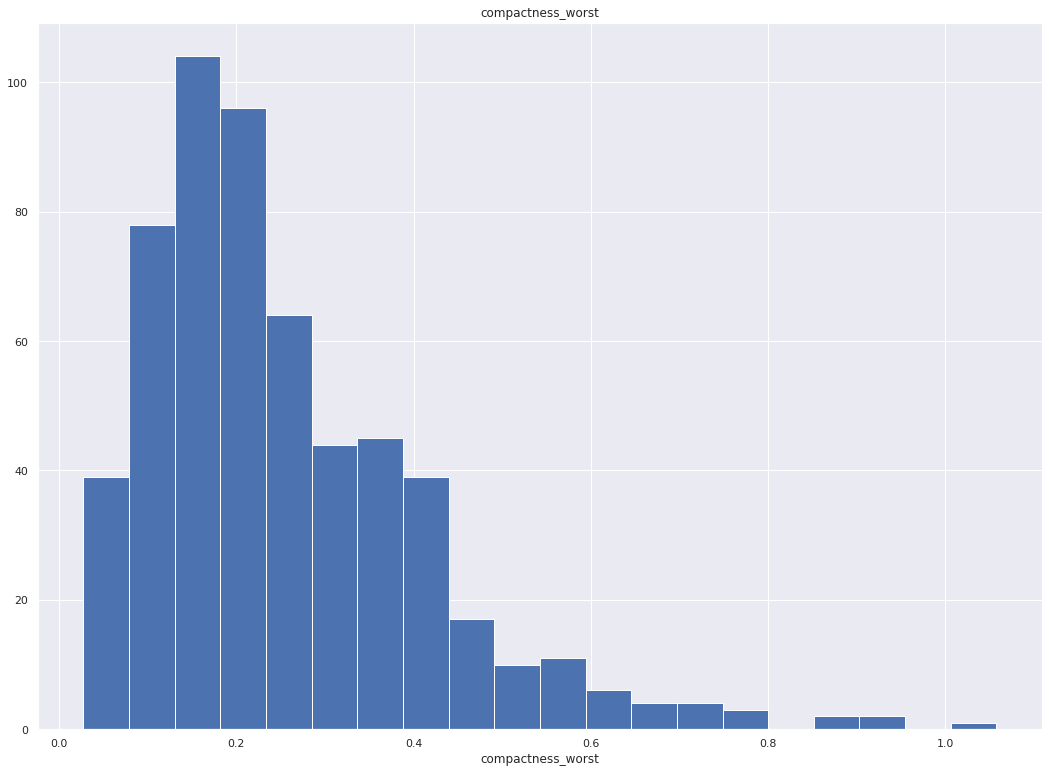

count   569.0000
mean      0.2722
std       0.2086
min       0.0000
1%        0.0000
5%        0.0184
10%       0.0457
20%       0.0920
30%       0.1369
40%       0.1772
50%       0.2267
60%       0.2866
70%       0.3499
80%       0.4195
90%       0.5713
95%       0.6824
99%       0.9024
max       1.2520
Name: concavity_worst, dtype: float64


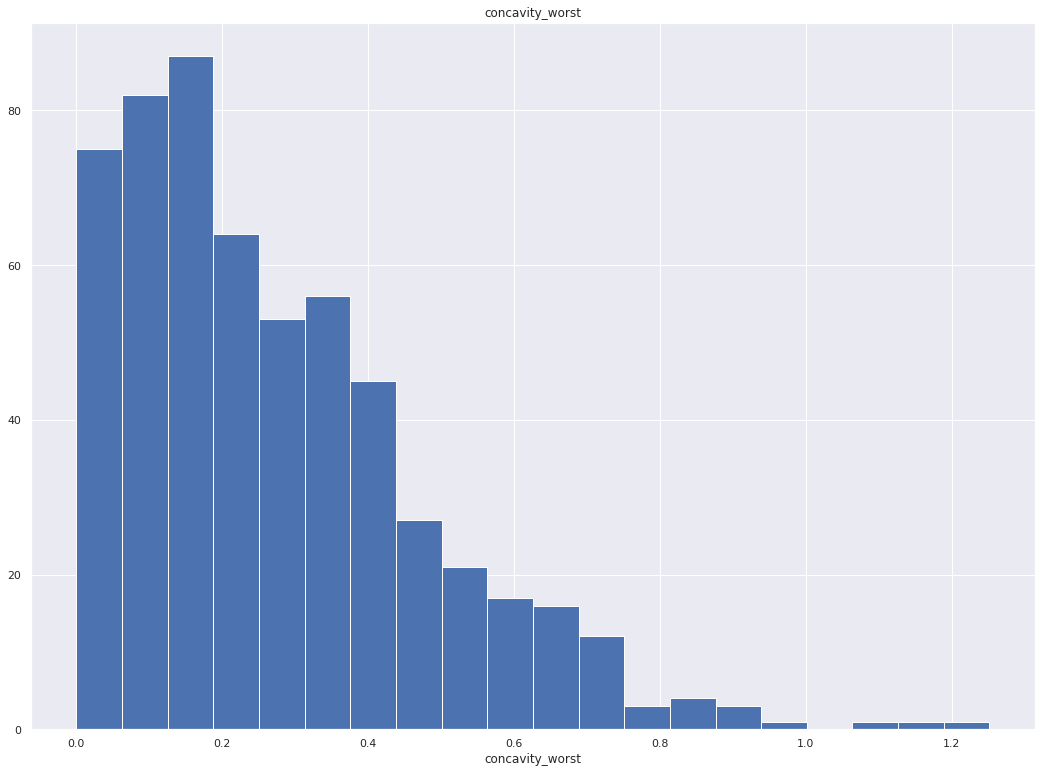

count   569.0000
mean      0.1146
std       0.0657
min       0.0000
1%        0.0000
5%        0.0243
10%       0.0385
20%       0.0581
30%       0.0717
40%       0.0839
50%       0.0999
60%       0.1218
70%       0.1508
80%       0.1775
90%       0.2089
95%       0.2369
99%       0.2692
max       0.2910
Name: concave points_worst, dtype: float64


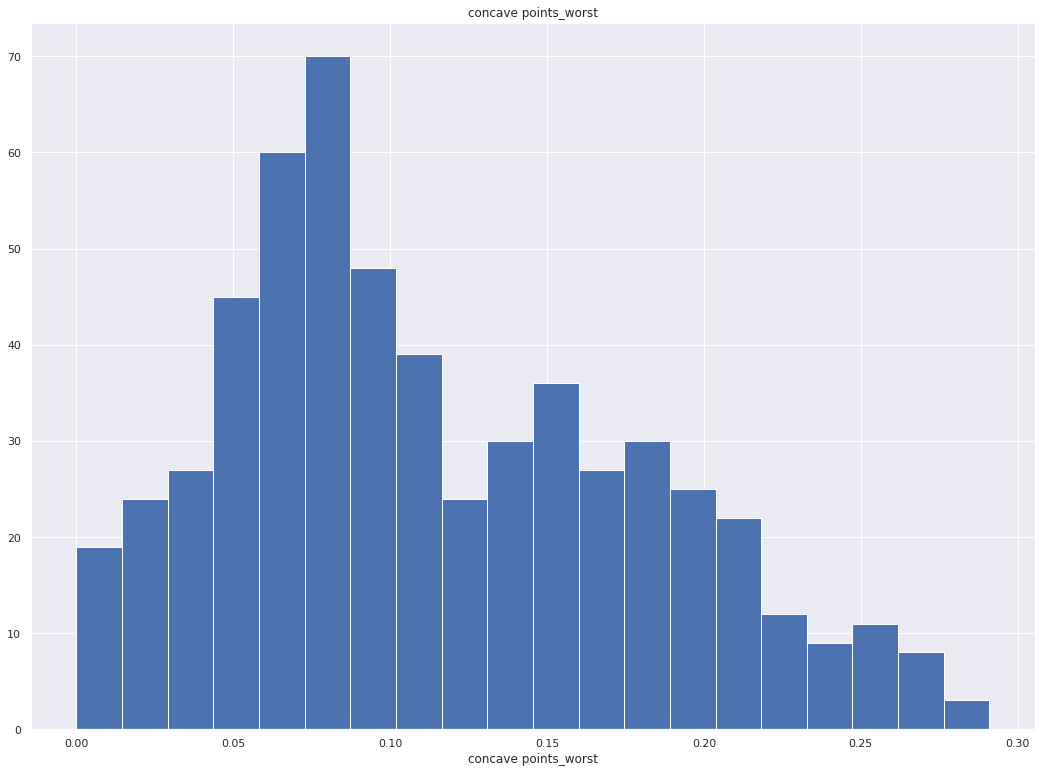

count   569.0000
mean      0.2901
std       0.0619
min       0.1565
1%        0.1760
5%        0.2127
10%       0.2261
20%       0.2436
30%       0.2565
40%       0.2694
50%       0.2822
60%       0.2965
70%       0.3102
80%       0.3254
90%       0.3601
95%       0.4062
99%       0.4869
max       0.6638
Name: symmetry_worst, dtype: float64


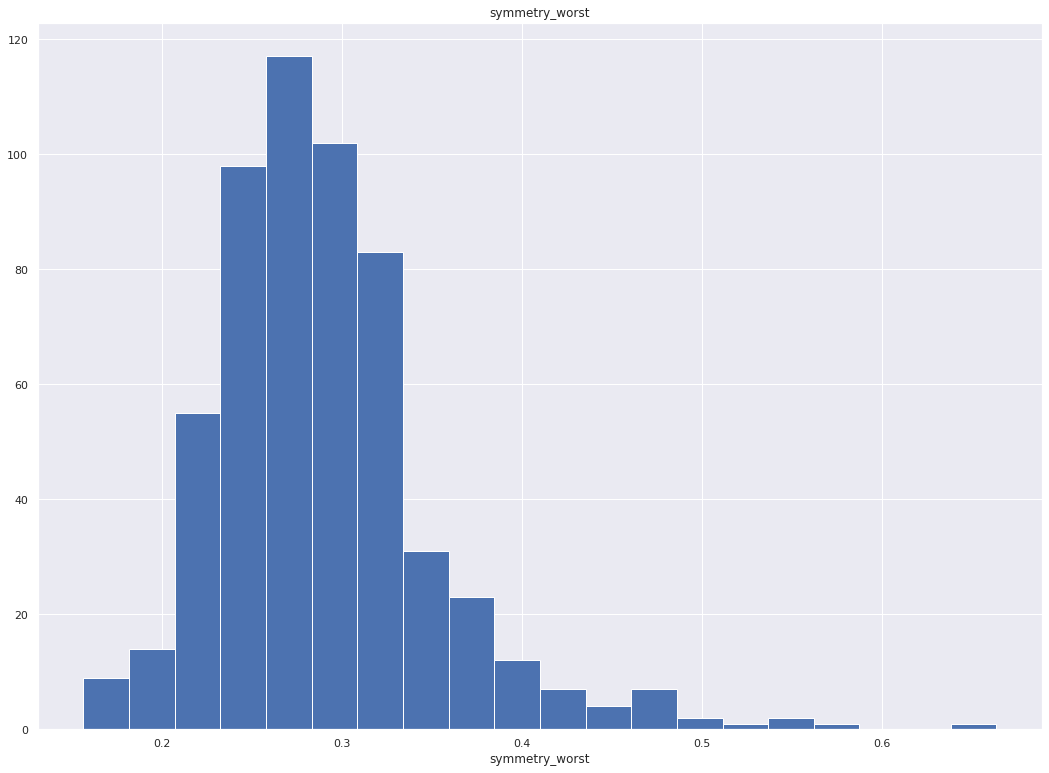

count   569.0000
mean      0.0839
std       0.0181
min       0.0550
1%        0.0586
5%        0.0626
10%       0.0658
20%       0.0697
30%       0.0735
40%       0.0769
50%       0.0800
60%       0.0832
70%       0.0890
80%       0.0959
90%       0.1063
95%       0.1195
99%       0.1406
max       0.2075
Name: fractal_dimension_worst, dtype: float64


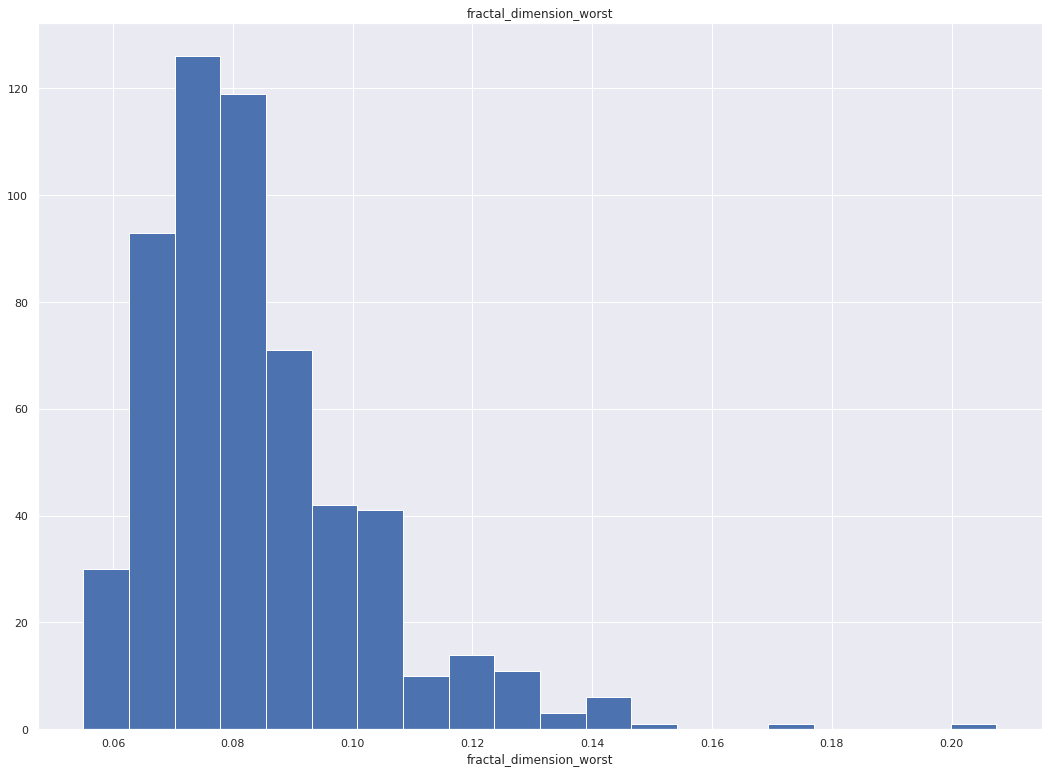

In [77]:
num_summary_df(df)

In [78]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  plt.figure(figsize=(30,30))
  for index, col in enumerate(num_cols):
    plt.subplot(8,4,index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

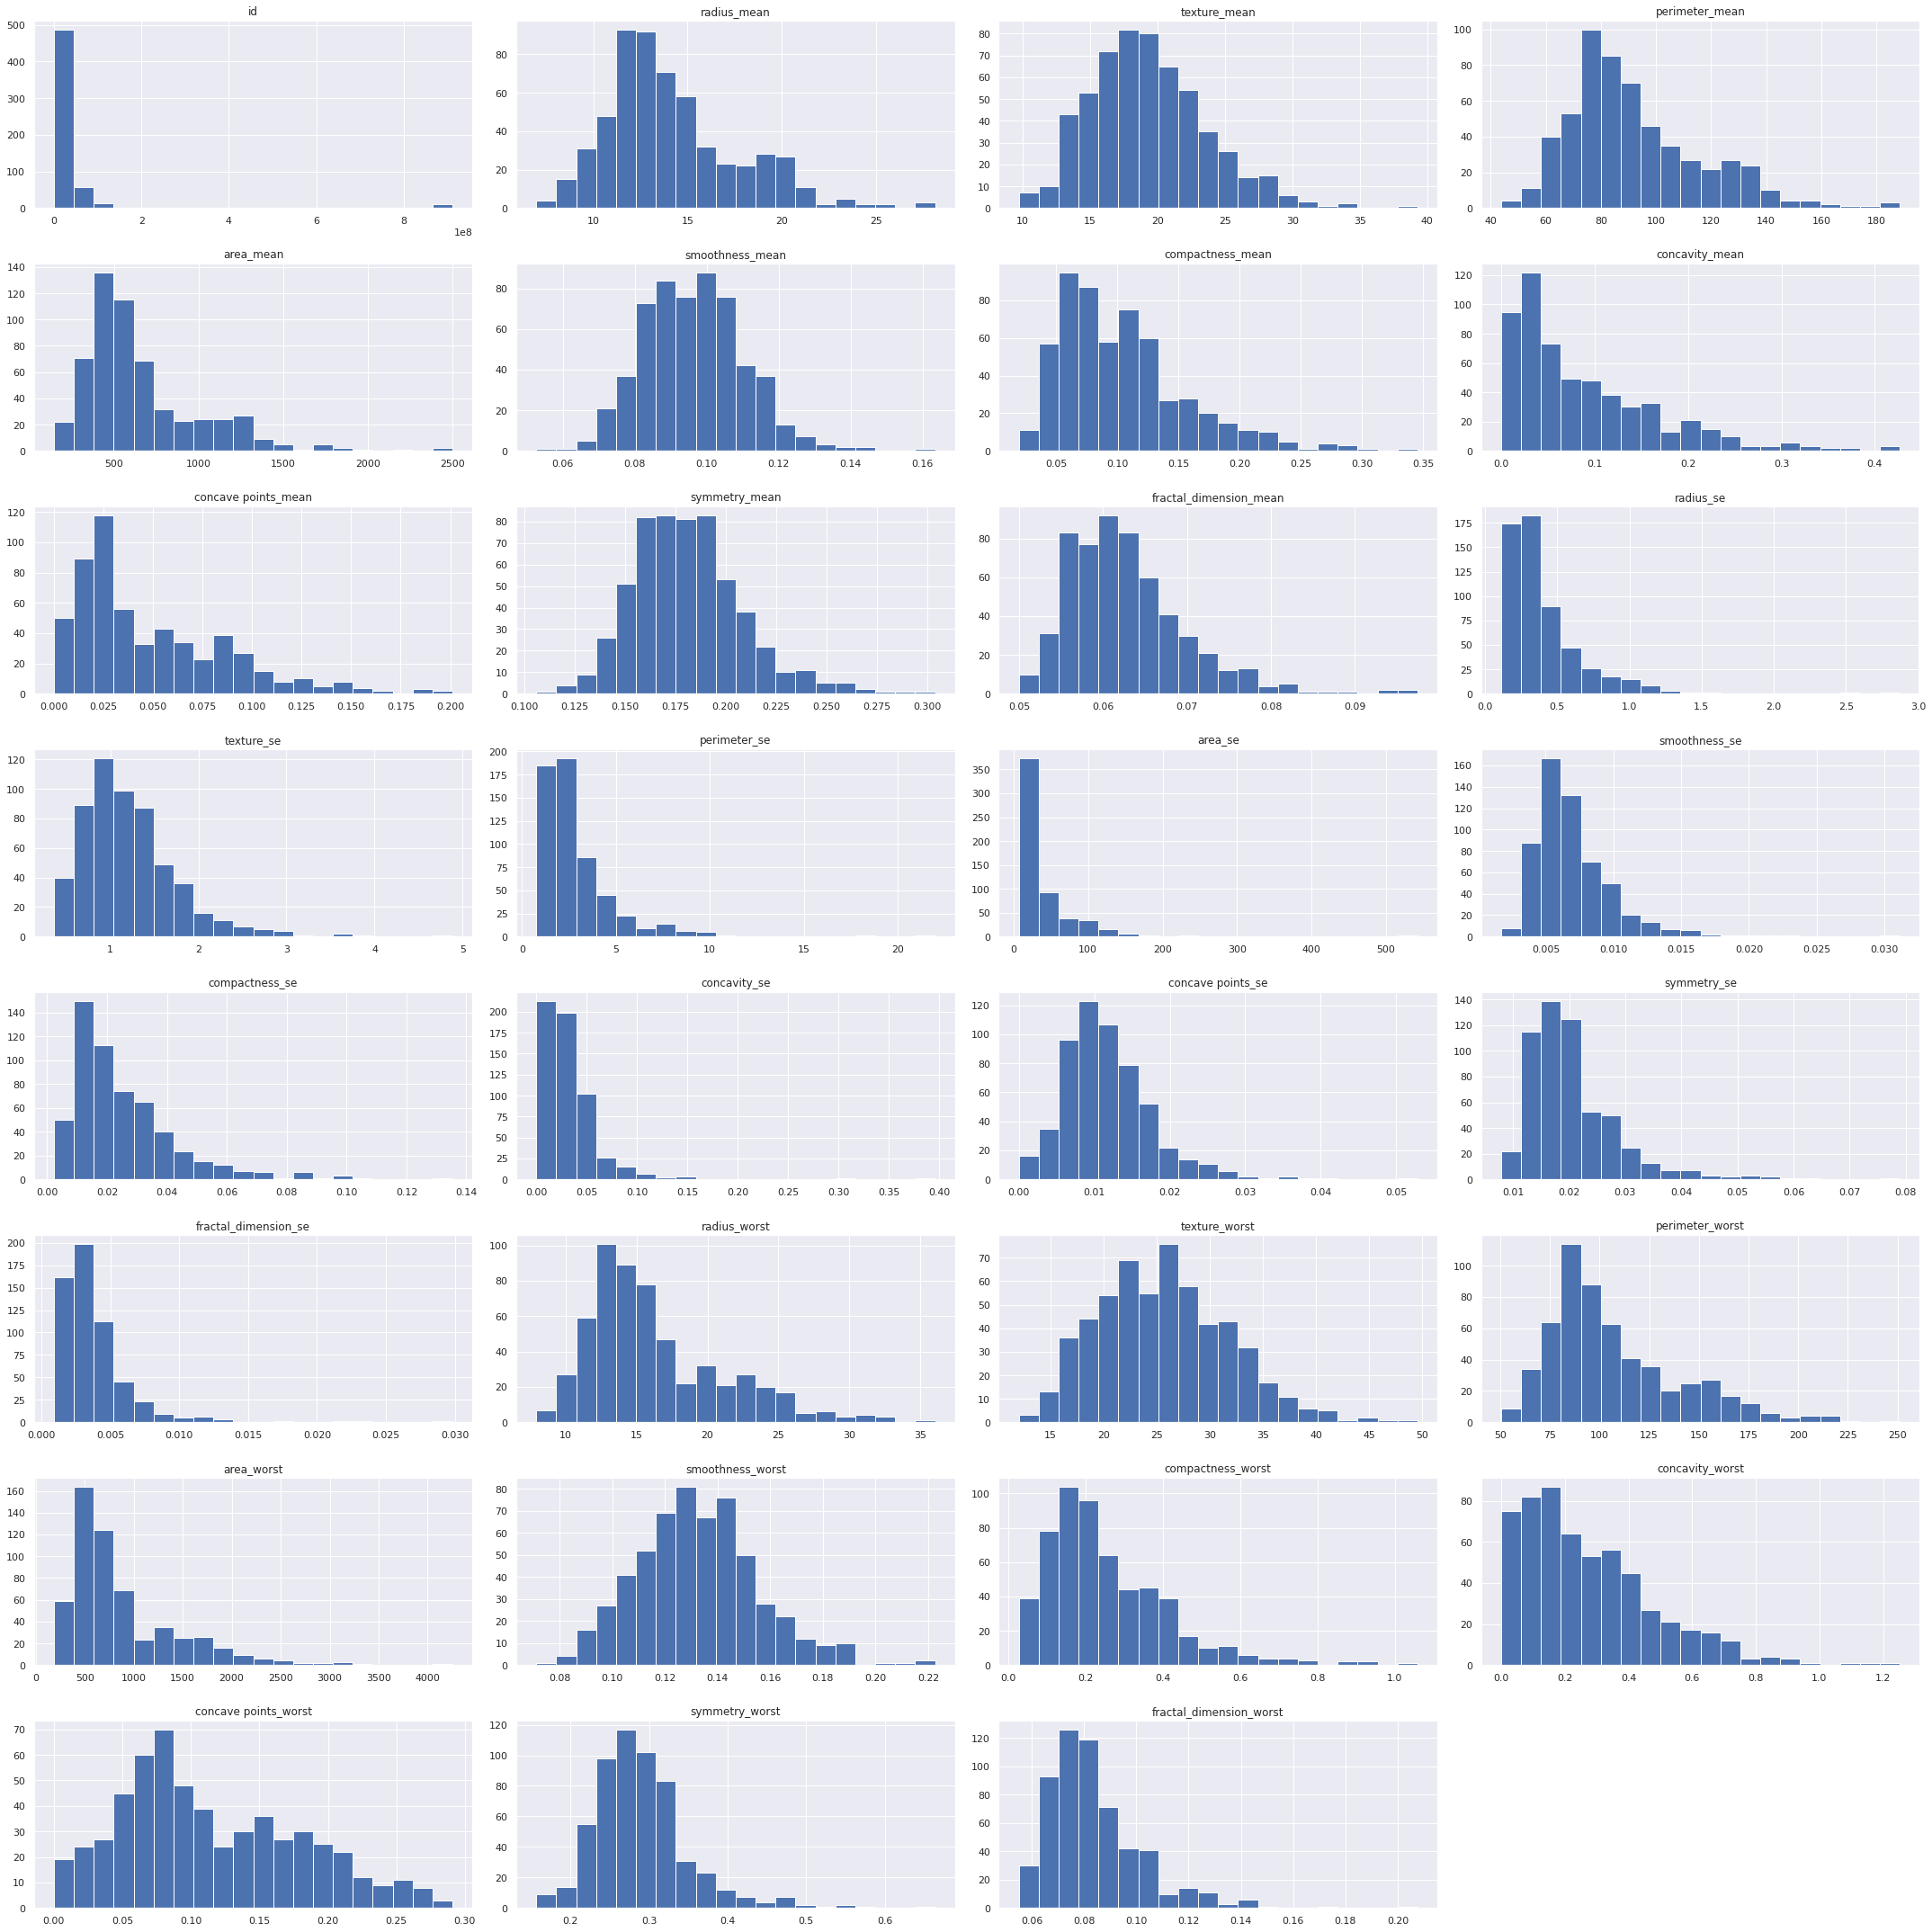

In [79]:
plot_num_summary(df)

In [80]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}))
  print("#############################################")

In [81]:
def target_summary_with_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    target_summary_with_num(dataframe, target, col)

In [82]:
target_summary_with_num_df(df, "diagnosis")

                     id
diagnosis              
B         26543824.6246
M         36818050.4434
#############################################
           radius_mean
diagnosis             
B              12.1465
M              17.4628
#############################################
           texture_mean
diagnosis              
B               17.9148
M               21.6049
#############################################
           perimeter_mean
diagnosis                
B                 78.0754
M                115.3654
#############################################
           area_mean
diagnosis           
B           462.7902
M           978.3764
#############################################
           smoothness_mean
diagnosis                 
B                   0.0925
M                   0.1029
#############################################
           compactness_mean
diagnosis                  
B                    0.0801
M                    0.1452
################################

# Correlation Analysis

In [83]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.0000,0.0746,0.0998,0.0732,0.0969,-0.0130,0.0001,0.0501,0.0442,-0.0221,-0.0525,0.1430,-0.0075,0.1373,0.1777,0.0968,0.0340,0.0552,0.0788,-0.0173,0.0257,0.0824,0.0647,0.0800,0.1072,0.0103,-0.0030,0.0232,0.0352,-0.0442,-0.0299
radius_mean,0.0746,1.0000,0.3238,0.9979,0.9874,0.1706,0.5061,0.6768,0.8225,0.1477,-0.3116,0.6791,-0.0973,0.6742,0.7359,-0.2226,0.2060,0.1942,0.3762,-0.1043,-0.0426,0.9695,0.2970,0.9651,0.9411,0.1196,0.4135,0.5269,0.7442,0.1640,0.0071
texture_mean,0.0998,0.3238,1.0000,0.3295,0.3211,-0.0234,0.2367,0.3024,0.2935,0.0714,-0.0764,0.2759,0.3864,0.2817,0.2598,0.0066,0.1920,0.1433,0.1639,0.0091,0.0545,0.3526,0.9120,0.3580,0.3435,0.0775,0.2778,0.3010,0.2953,0.1050,0.1192
perimeter_mean,0.0732,0.9979,0.3295,1.0000,0.9865,0.2073,0.5569,0.7161,0.8510,0.1830,-0.2615,0.6918,-0.0868,0.6931,0.7450,-0.2027,0.2507,0.2281,0.4072,-0.0816,-0.0055,0.9695,0.3030,0.9704,0.9415,0.1505,0.4558,0.5639,0.7712,0.1891,0.0510
area_mean,0.0969,0.9874,0.3211,0.9865,1.0000,0.1770,0.4985,0.6860,0.8233,0.1513,-0.2831,0.7326,-0.0663,0.7266,0.8001,-0.1668,0.2126,0.2077,0.3723,-0.0725,-0.0199,0.9627,0.2875,0.9591,0.9592,0.1235,0.3904,0.5126,0.7220,0.1436,0.0037
smoothness_mean,-0.0130,0.1706,-0.0234,0.2073,0.1770,1.0000,0.6591,0.5220,0.5537,0.5578,0.5848,0.3015,0.0684,0.2961,0.2466,0.3324,0.3189,0.2484,0.3807,0.2008,0.2836,0.2131,0.0361,0.2389,0.2067,0.8053,0.4725,0.4349,0.5031,0.3943,0.4993
compactness_mean,0.0001,0.5061,0.2367,0.5569,0.4985,0.6591,1.0000,0.8831,0.8311,0.6026,0.5654,0.4975,0.0462,0.5489,0.4557,0.1353,0.7387,0.5705,0.6423,0.2300,0.5073,0.5353,0.2481,0.5902,0.5096,0.5655,0.8658,0.8163,0.8156,0.5102,0.6874
concavity_mean,0.0501,0.6768,0.3024,0.7161,0.6860,0.5220,0.8831,1.0000,0.9214,0.5007,0.3368,0.6319,0.0762,0.6604,0.6174,0.0986,0.6703,0.6913,0.6833,0.1780,0.4493,0.6882,0.2999,0.7296,0.6760,0.4488,0.7550,0.8841,0.8613,0.4095,0.5149
concave points_mean,0.0442,0.8225,0.2935,0.8510,0.8233,0.5537,0.8311,0.9214,1.0000,0.4625,0.1669,0.6980,0.0215,0.7106,0.6903,0.0277,0.4904,0.4392,0.6156,0.0954,0.2576,0.8303,0.2928,0.8559,0.8096,0.4528,0.6675,0.7524,0.9102,0.3757,0.3687
symmetry_mean,-0.0221,0.1477,0.0714,0.1830,0.1513,0.5578,0.6026,0.5007,0.4625,1.0000,0.4799,0.3034,0.1281,0.3139,0.2240,0.1873,0.4217,0.3426,0.3933,0.4491,0.3318,0.1857,0.0907,0.2192,0.1772,0.4267,0.4732,0.4337,0.4303,0.6998,0.4384


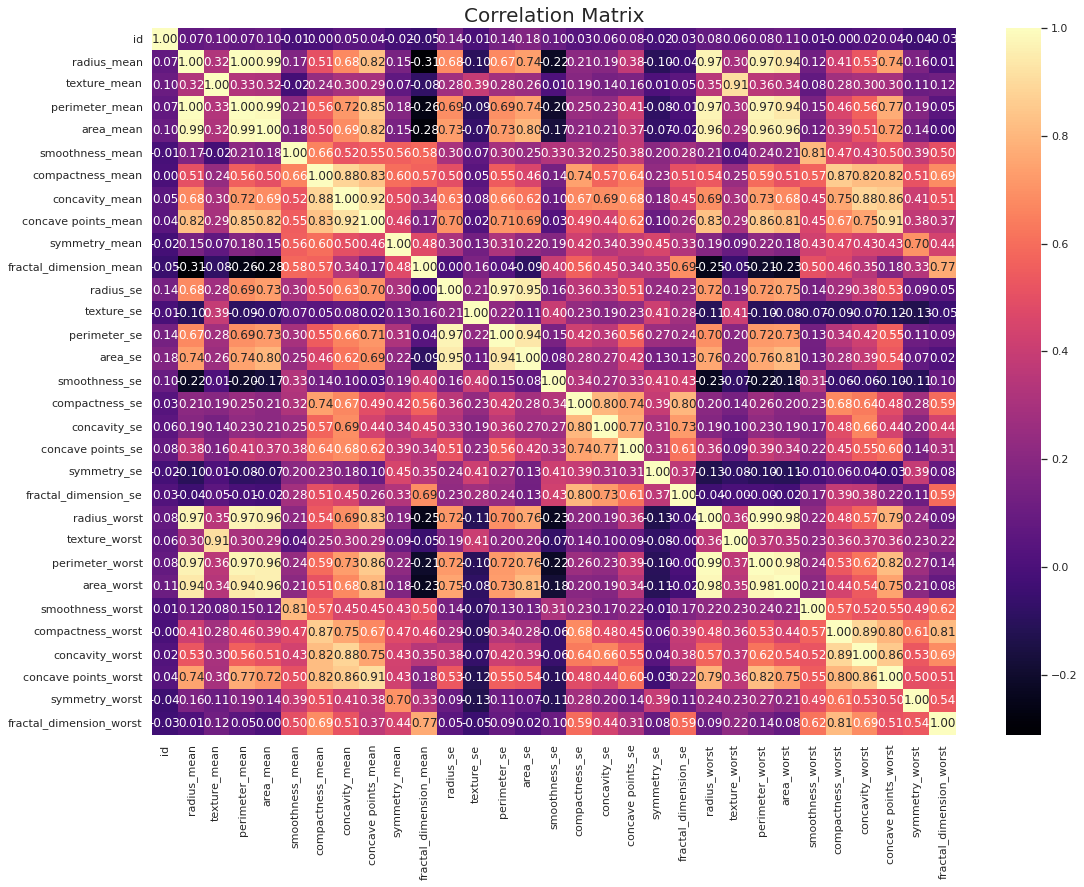

In [84]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [85]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

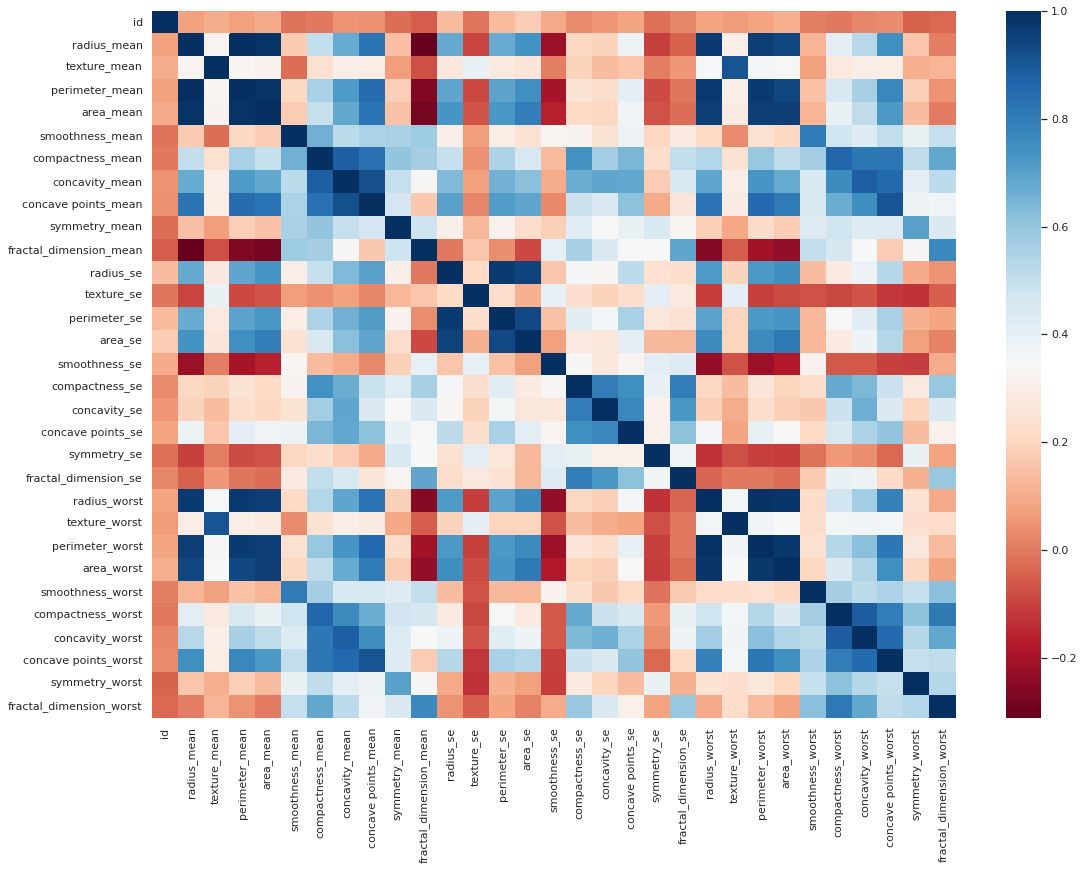

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [86]:
high_correlated_cols(df, plot=True)

# Missing Value Analysis

In [87]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Outlier Analysis

In [88]:
def outlier_thresholds(dataframe,col_name,q1=0.10,q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [89]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [90]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [91]:
def solve_outliers(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  num_cols = [col for col in num_cols if col!="id"]
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))
      if check_outlier(dataframe, col):
        replace_with_thresholds(dataframe, col)

In [92]:
solve_outliers(df, "diagnosis")

radius_mean False
texture_mean False
perimeter_mean False
area_mean True
smoothness_mean False
compactness_mean False
concavity_mean False
concave points_mean False
symmetry_mean False
fractal_dimension_mean False
radius_se True
texture_se True
perimeter_se True
area_se True
smoothness_se True
compactness_se True
concavity_se True
concave points_se True
symmetry_se True
fractal_dimension_se True
radius_worst False
texture_worst False
perimeter_worst False
area_worst True
smoothness_worst False
compactness_worst True
concavity_worst False
concave points_worst False
symmetry_worst True
fractal_dimension_worst True


In [93]:
def check_outlier_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  num_cols = [col for col in num_cols if col!="id"]
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))

In [94]:
check_outlier_df(df, "diagnosis")

radius_mean False
texture_mean False
perimeter_mean False
area_mean False
smoothness_mean False
compactness_mean False
concavity_mean False
concave points_mean False
symmetry_mean False
fractal_dimension_mean False
radius_se False
texture_se False
perimeter_se False
area_se False
smoothness_se False
compactness_se False
concavity_se False
concave points_se False
symmetry_se False
fractal_dimension_se False
radius_worst False
texture_worst False
perimeter_worst False
area_worst False
smoothness_worst False
compactness_worst False
concavity_worst False
concave points_worst False
symmetry_worst False
fractal_dimension_worst False


# Plot PCA Model for 2-D

In [122]:
def create_pca_df(dataframe, target, id_label="id", n_components=2):
    y = dataframe[target]
    X = dataframe.drop([target, id_label], axis=1)
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=n_components)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

In [123]:
pca_df = create_pca_df(df, "diagnosis")

In [127]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

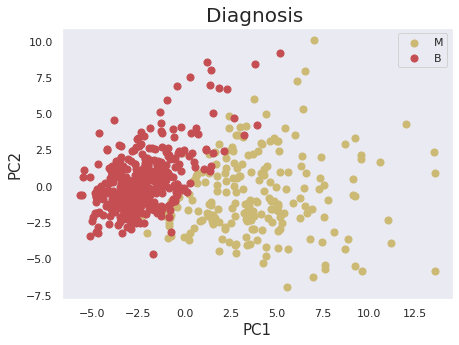

In [128]:
plot_pca(pca_df, "diagnosis")

# Create PCA Model

In [135]:
def PCA_model(dataframe, target, id_label="id", n_components=5, results=True, save_results=True):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  num_cols = [col for col in num_cols if col!=id_label]
  y = dataframe[target]
  df = dataframe[num_cols]
  df = StandardScaler().fit_transform(df)
  pca_model = PCA(n_components=n_components)
  pca_model_fit = pca_model.fit_transform(df)
  if results:
    pca = PCA().fit(df)

    print("######################### Expalined Variance for n_components({0}) #########################".format(n_components))
    print("\nExplained Variance: ", pca_model.explained_variance_ratio_)
    print("\nExplained CumSum Variance: ", np.cumsum(pca_model.explained_variance_ratio_))
    print("\n######################### Expalined Variance for All Components) #########################")
    print("\nExplained Variance: ", pca.explained_variance_ratio_)
    print("\nExplained CumSum Variance: ", np.cumsum(pca.explained_variance_ratio_))
    
    plt.figure(figsize=(16,10))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title("Explainability Ratio of Variables")

  if save_results:
    pca_df = pd.DataFrame(data=pca_model_fit, columns=["PC1", "PC2","PC3","PC4","PC5"])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    final_df.to_csv("final_df.csv")
    final_df.head()
  
  return final_df

######################### Expalined Variance for n_components(5) #########################

Explained Variance:  [0.45585506 0.19027115 0.09181924 0.06529752 0.05399033]

Explained CumSum Variance:  [0.45585506 0.64612622 0.73794546 0.80324298 0.85723331]

######################### Expalined Variance for All Components) #########################

Explained Variance:  [4.55855062e-01 1.90271154e-01 9.18192418e-02 6.52975200e-02
 5.39903335e-02 4.00100783e-02 2.04543077e-02 1.51800604e-02
 1.30002795e-02 1.07465034e-02 9.17210742e-03 7.92246448e-03
 6.05637844e-03 5.19364180e-03 3.13906523e-03 2.28196140e-03
 1.76258993e-03 1.60346939e-03 1.12246945e-03 9.68612597e-04
 9.30756719e-04 8.08919478e-04 7.28790721e-04 6.11983008e-04
 3.81525475e-04 3.27401027e-04 2.78109910e-04 5.89656401e-05
 2.13228110e-05 4.92470916e-06]

Explained CumSum Variance:  [0.45585506 0.64612622 0.73794546 0.80324298 0.85723331 0.89724339
 0.9176977  0.93287776 0.94587804 0.95662454 0.96579665 0.97371911
 0.97977

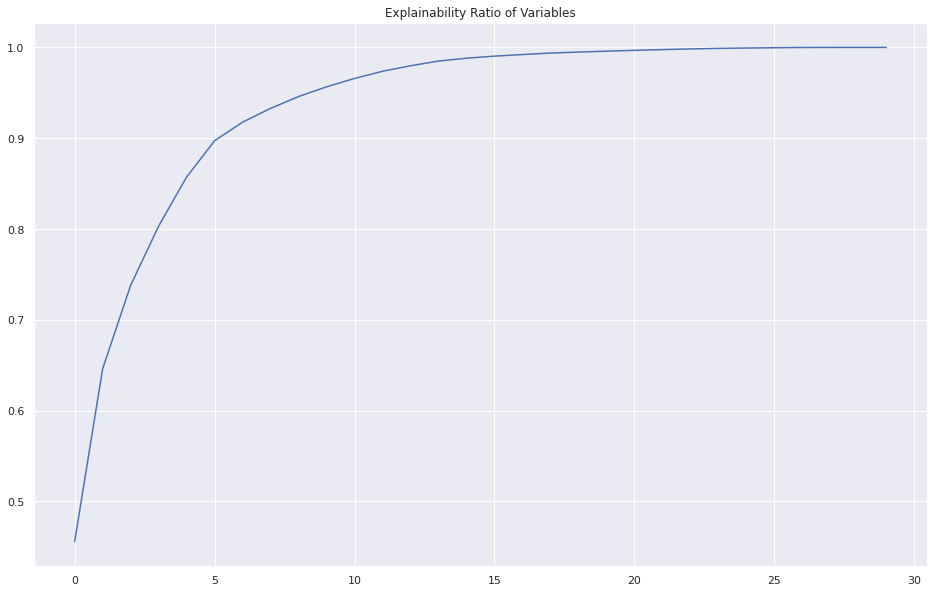

In [136]:
final_df = PCA_model(df, "diagnosis")

# Create Principal Component Regression(PCR) Model

📌 It is based on the idea of establishing a regression model for the resulting components after dimension reduction is applied to the variables.

In [139]:
final_df = PCA_model(df, "diagnosis", results=False)
final_df.head()

,PC1,PC2,PC3,PC4,PC5,diagnosis
0,9.5788,1.8677,-1.1822,-3.6086,-1.2849,M
1,2.4157,-3.8723,-0.5401,-1.1527,0.4118,M
2,5.8827,-1.1629,-0.4894,-0.9685,-0.3148,M
3,7.0066,10.0681,-2.8748,0.0019,-2.2073,M
4,4.1525,-1.9217,1.4021,-3.1316,0.4439,M


# Encoding Scaling

In [143]:
cat_cols, num_cols, cat_but_car = grab_col_names(final_df)

#Print Categorical and Numerical Variables
print(f"Observations: {final_df.shape[0]}")
print(f"Variables: {final_df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 569
Variables: 6
Cat_cols: 1
Num_cols: 5
Cat_but_car: 0


In [144]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [146]:
binary_cols = [col for col in final_df.columns if final_df[col].dtypes == "O" and final_df[col].nunique() == 2]
for col in binary_cols:
    final_df = label_encoder(final_df, col)

In [147]:
final_df.head()

,PC1,PC2,PC3,PC4,PC5,diagnosis
0,9.5788,1.8677,-1.1822,-3.6086,-1.2849,1
1,2.4157,-3.8723,-0.5401,-1.1527,0.4118,1
2,5.8827,-1.1629,-0.4894,-0.9685,-0.3148,1
3,7.0066,10.0681,-2.8748,0.0019,-2.2073,1
4,4.1525,-1.9217,1.4021,-3.1316,0.4439,1


# Create a Base Model

In [155]:
def create_base_model(dataframe, target, test_size=0.20, cv=10, plot=False, save_results=False):
  names = []
  acc_results = []
  acc_train_results = []
  acc_test_results = []
  r2_results = []
  r2_train_results = []
  r2_test_results = []
  cv_results_acc = []
  cv_results_f1 = []
  cv_results_roc_auc = []

  X = dataframe.drop([target], axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)
  rs = 123
  models = [('LogR', LogisticRegression(random_state=rs)),
            ("NB", GaussianNB()),
            ("KNN", KNeighborsClassifier()),
            ("SVC", SVC(random_state=rs)),
            ('ANN', MLPClassifier(random_state=rs)),
            ('CART', DecisionTreeClassifier(random_state=rs)),
            ('RF', RandomForestClassifier(random_state=rs)),
            ("AdaBoost", AdaBoostClassifier(random_state=rs)),
            ('BGTrees', BaggingClassifier(bootstrap_features=True, random_state=rs)),
            ('GBM', GradientBoostingClassifier(random_state=rs)),
            ("XGBoost", XGBClassifier(objective='reg:squarederror', random_state=rs)),
            ("LightGBM", LGBMClassifier(random_state=rs)),
            ("CatBoost", CatBoostClassifier(verbose=False, random_state=rs))]

  for name, classifier in models:
    model_fit = classifier.fit(X_train, y_train)
    # Acc Score
    acc = accuracy_score(y, model_fit.predict(X))
    acc_train = accuracy_score(y_train, model_fit.predict(X_train))
    acc_test = accuracy_score(y_test, model_fit.predict(X_test))
    acc_results.append(acc)
    acc_train_results.append(acc_train)
    acc_test_results.append(acc_test)

    # R2 Score
    r2 = model_fit.score(X, y)
    r2_train = model_fit.score(X_train, y_train)
    r2_test = model_fit.score(X_test, y_test)
    r2_results.append(r2)
    r2_train_results.append(r2_train)
    r2_test_results.append(r2_test)

    # Cross Validate Score
    cv_result = cross_validate(model_fit, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_result_acc = cv_result["test_accuracy"].mean()
    cv_result_f1 = cv_result["test_f1"].mean()
    cv_result_roc_auc = cv_result["test_roc_auc"].mean()
    cv_results_acc.append(cv_result_acc)
    cv_results_f1.append(cv_result_f1)
    cv_results_roc_auc.append(cv_result_roc_auc)

    # Model names
    names.append(name)
  
  model_results = pd.DataFrame({'Model_Names': names,
                                'Acc': acc_results,
                                'Acc_Train': acc_train_results,
                                'Acc_Test': acc_test_results,
                                'R2': acc_train_results,
                                'R2_Train': r2_train_results,
                                'R2_Test': r2_test_results,
                                'CV_Acc': cv_results_acc,
                                'CV_f1': cv_results_f1,
                                'CV_roc_auc': cv_results_roc_auc
                                }).set_index("Model_Names")
  model_results=model_results.sort_values(by="CV_roc_auc", ascending=False)
  print(model_results)

  if plot:
    plt.figure(figsize=(15, 12))
    sns.barplot(x='CV_roc_auc', y=model_results.index, data=model_results, color="r")
    plt.xlabel('Roc_Auc')
    plt.ylabel('Model Names')
    plt.title('Roc_Auc for All Models')
    plt.show()
  
  if save_results:
    model_results.to_csv("model_results.csv")
  
  return model_results

               Acc  Acc_Train  Acc_Test     R2  R2_Train  R2_Test  CV_Acc  CV_f1  CV_roc_auc
Model_Names                                                                                 
ANN         0.9772     0.9802    0.9649 0.9802    0.9802   0.9649  0.9736 0.9643      0.9953
LogR        0.9772     0.9780    0.9737 0.9780    0.9780   0.9737  0.9754 0.9668      0.9951
SVC         0.9719     0.9736    0.9649 0.9736    0.9736   0.9649  0.9736 0.9642      0.9947
CatBoost    0.9912     1.0000    0.9561 1.0000    1.0000   0.9561  0.9561 0.9412      0.9924
LightGBM    0.9947     1.0000    0.9737 1.0000    1.0000   0.9737  0.9543 0.9387      0.9889
KNN         0.9701     0.9714    0.9649 0.9714    0.9714   0.9649  0.9578 0.9424      0.9889
RF          0.9912     1.0000    0.9561 1.0000    1.0000   0.9561  0.9385 0.9185      0.9875
AdaBoost    0.9912     1.0000    0.9561 1.0000    1.0000   0.9561  0.9508 0.9344      0.9871
GBM         0.9877     1.0000    0.9386 1.0000    1.0000   0.9386  0.9

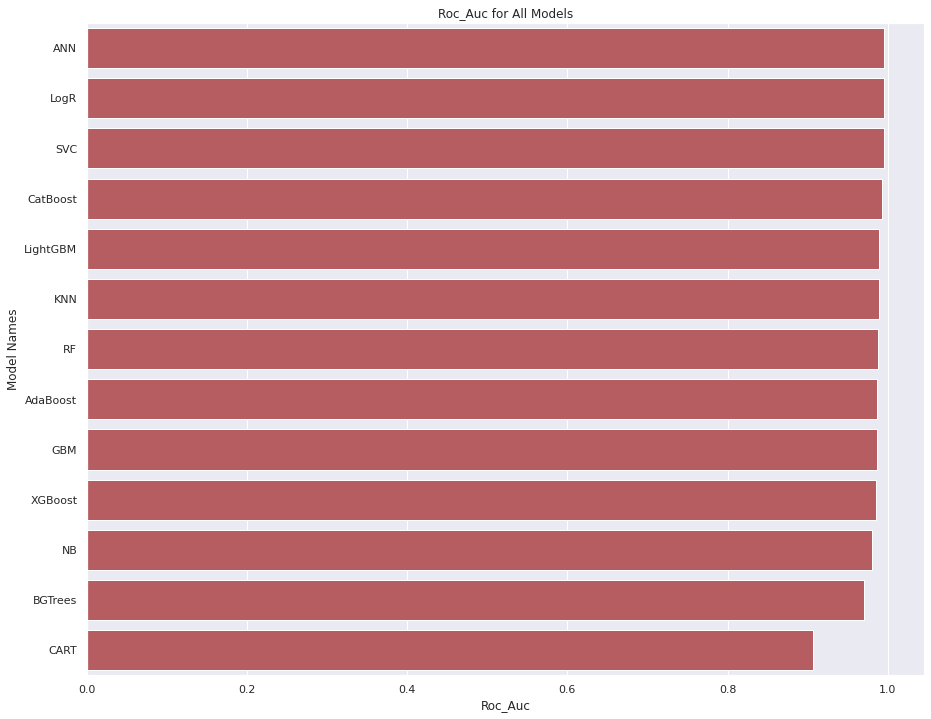

In [156]:
model_results = create_base_model(final_df, "diagnosis", test_size=0.20, cv=3, plot=True, save_results=True)

# Create Model Tuned

In [159]:
def create_model_tuned(dataframe, target, test_size=0.20, cv=10, plot=False, save_results=False):
  names = []
  acc_results = []
  acc_train_results = []
  acc_test_results = []
  r2_results = []
  r2_train_results = []
  r2_test_results = []
  cv_results_acc = []
  cv_results_f1 = []
  cv_results_roc_auc = []
  best_params = []

  X = dataframe.drop([target], axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)

  knn_params = {"n_neighbors": np.arange(1,50,1)}

  svc_params = {"C": np.arange(1,10)}

  ann_params = {"alpha": [0.1, 0.01],
                "hidden_layer_sizes": [(50,50,50), (100,100,100), (200,200,200)],
                "solver": ["adam","sgd"],
                "activation": ["relu","logistic"]}

  cart_params = {"max_depth": list(range(1,20)),
                 "min_samples_split": list(range(2,50))}

  rf_params = {"max_depth": [2,5,8],
               "max_features": [2,5,8],
               "n_estimators": [500,1000],
               "min_samples_split": [5,10]}

  adaboost_params = {"learning_rate": [0.1,0.01],
                     "n_estimators": [50,100,500,1000]}

  bgtrees_params = {"max_samples": [1,2,5,8],
                    "max_features": [1,2,5,8],
                    "n_estimators": [10, 50, 100]}

  gbm_params = {"learning_rate": [0.1,0.01],
                "n_estimators": [100,500,1000],
                "max_depth": [3,5,10],
                "min_samples_split": [2,5,10]}

  xgboost_params = {"n_estimators": [500,1000,2000],
                   "subsample": [0.6,0.8,1],
                   "max_depth": [4,5,6],
                   "learning_rate": [0.1,0.01],
                   "min_samples_split": [2,5,10]}

  lightgbm_params = {"n_estimators": [500,1000,2000],
                     "subsample": [0.6,0.8,1],
                     "max_depth": [4,5,6],
                     "learning_rate": [0.1,0.01],
                     "min_child_samples": [5,10,20]}

  catboost_params = {"iterations": [200,500],
                     "learning_rate": [0.1,0.01],
                     "depth": [3,5,8]}

  rs = 123
  models = [("KNN", KNeighborsClassifier(), knn_params),
            ("SVC", SVC(random_state=rs), svc_params),
            ('ANN', MLPClassifier(random_state=rs), ann_params),
            ('CART', DecisionTreeClassifier(random_state=rs), cart_params),
            ('RF', RandomForestClassifier(random_state=rs), rf_params),
            ("AdaBoost", AdaBoostClassifier(random_state=rs), adaboost_params),
            ('BGTrees', BaggingClassifier(bootstrap_features=True, random_state=rs), bgtrees_params),
            ('GBM', GradientBoostingClassifier(random_state=rs), gbm_params),
            ("XGBoost", XGBClassifier(objective='reg:squarederror', random_state=rs), xgboost_params),
            ("LightGBM", LGBMClassifier(random_state=rs), lightgbm_params),
            ("CatBoost", CatBoostClassifier(verbose=False, random_state=rs), catboost_params)]

  for name, classifier, params in models:
    gs_best = GridSearchCV(classifier, params, cv=3, n_jobs=-1, verbose=False).fit(X_train, y_train)
    final_model = classifier.set_params(**gs_best.best_params_).fit(X_train, y_train)
    # Acc Score
    acc = accuracy_score(y, final_model.predict(X))
    acc_train = accuracy_score(y_train, final_model.predict(X_train))
    acc_test = accuracy_score(y_test, final_model.predict(X_test))
    acc_results.append(acc)
    acc_train_results.append(acc_train)
    acc_test_results.append(acc_test)

    # R2 Score
    r2 = final_model.score(X, y)
    r2_train = final_model.score(X_train, y_train)
    r2_test = final_model.score(X_test, y_test)
    r2_results.append(r2)
    r2_train_results.append(r2_train)
    r2_test_results.append(r2_test)

    # Cross Validate Score
    cv_result = cross_validate(final_model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_result_acc = cv_result["test_accuracy"].mean()
    cv_result_f1 = cv_result["test_f1"].mean()
    cv_result_roc_auc = cv_result["test_roc_auc"].mean()
    cv_results_acc.append(cv_result_acc)
    cv_results_f1.append(cv_result_f1)
    cv_results_roc_auc.append(cv_result_roc_auc)

    # Best Params
    best_params.append(gs_best.best_params_)

    # Model names
    names.append(name)
  
  model_results = pd.DataFrame({'Model_Names': names,
                                'Acc': acc_results,
                                'Acc_Train': acc_train_results,
                                'Acc_Test': acc_test_results,
                                'R2': acc_train_results,
                                'R2_Train': r2_train_results,
                                'R2_Test': r2_test_results,
                                'CV_Acc': cv_results_acc,
                                'CV_f1': cv_results_f1,
                                'CV_roc_auc': cv_results_roc_auc,
                                'best_params': best_params
                                }).set_index("Model_Names")
  model_results=model_results.sort_values(by="CV_roc_auc", ascending=False)
  print(model_results)

  if plot:
    plt.figure(figsize=(15, 12))
    sns.barplot(x='CV_roc_auc', y=model_results.index, data=model_results, color="r")
    plt.xlabel('Roc_Auc')
    plt.ylabel('Model Names')
    plt.title('Roc_Auc for All Models')
    plt.show()
  
  if save_results:
    model_results.to_csv("model_results.csv")
  
  return model_results

               Acc  Acc_Train  Acc_Test     R2  R2_Train  R2_Test  CV_Acc  CV_f1  CV_roc_auc                                        best_params
Model_Names                                                                                                                                    
AdaBoost    0.9912     1.0000    0.9561 1.0000    1.0000   0.9561  0.9701 0.9599      0.9944       {'learning_rate': 0.1, 'n_estimators': 1000}
CatBoost    0.9947     1.0000    0.9737 1.0000    1.0000   0.9737  0.9649 0.9524      0.9928  {'depth': 5, 'iterations': 500, 'learning_rate...
LightGBM    0.9947     1.0000    0.9737 1.0000    1.0000   0.9737  0.9596 0.9456      0.9912  {'learning_rate': 0.01, 'max_depth': 6, 'min_c...
GBM         0.9912     1.0000    0.9561 1.0000    1.0000   0.9561  0.9596 0.9451      0.9911  {'learning_rate': 0.1, 'max_depth': 3, 'min_sa...
RF          0.9912     0.9978    0.9649 0.9978    0.9978   0.9649  0.9561 0.9400      0.9902  {'max_depth': 8, 'max_features': 2, 'min_s

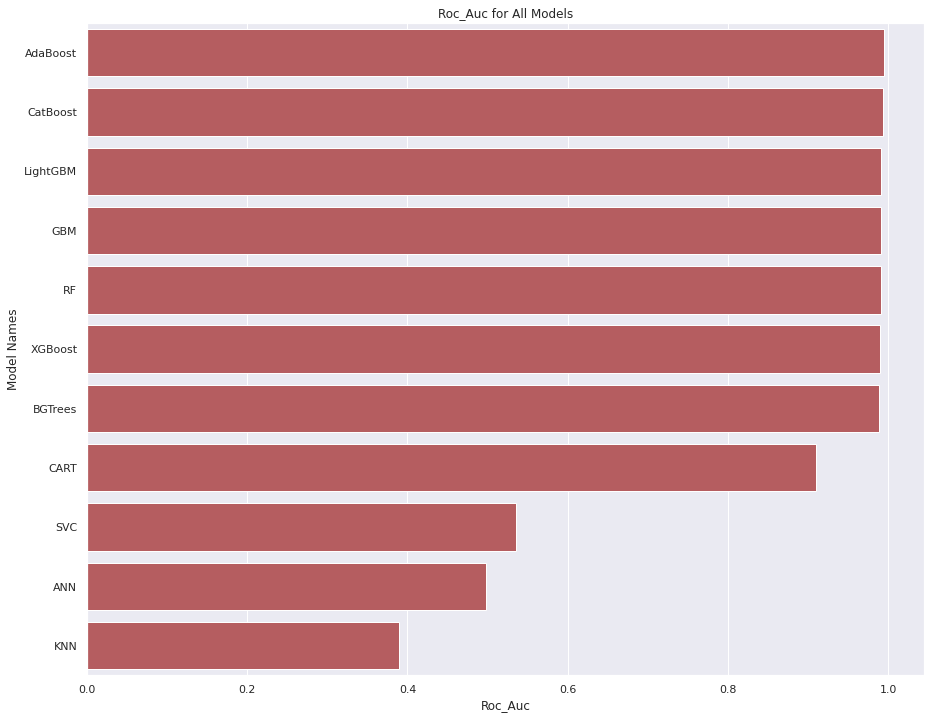

In [161]:
model_results = create_model_tuned(df, "diagnosis", test_size=0.20, cv=3, plot=True, save_results=True)